## Introduction

This project investigates key factors influencing car resale values, brand value retention, regional pricing variations, and customer satisfaction within the context of PakWheels.com. The study aims to provide actionable insights for car buyers, sellers, and market analysts in Pakistan

## Objectives

1. Identify the factors influencing used car resale values in Pakistan.
2. Analyze brand value retention and depreciation trends over time.
3. Explore regional variations in car prices and preferences.
4. Determine the drivers of customer satisfaction in vehicle reviews.


## Research Questions

1. **What Key Factors Drive Used Car Resale Values in Pakistan?**
   - Analyze the impact of mileage, age, brand, model, and engine specifications.
   - Correlate vehicle attributes with resale values.

2. **Do Certain Car Brands Retain Their Value Better Over Time?**
   - Compare depreciation rates across brands.
   - Evaluate the relationship between brand reputation and value retention.

3. **Is There a Regional Variation in Car Prices or Preferences in Pakistan?**
   - Explore regional differences in car types, brands, and pricing trends.

4. **What Drives Customer Satisfaction in Vehicle Reviews?**
   - Identify key satisfaction factors from reviews.
   - Build predictive models for overall satisfaction.


## Importing Libraries

In [328]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from json import loads, dumps
from wordcloud import WordCloud
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from causalinference import CausalModel

## Dataset Overview + EDA

### Ads Dataset

#### Loading the Dataset

In [ ]:
ads_df = pd.read_csv(os.path.join('datasets', 'dataset_1.csv'), index_col=0)

# Dropping duplicates if any
ads_df.drop_duplicates()

# Displaying the first few rows to understand the structure of the data
ads_df.head(3)

,url,Featured,Vehicle,Location,Model,Vehicle Type,Mileage,Engine Type,Transmission,Features,Details,Price,Seller Details,Seller's Comments
Ad Ref,,,,,,,,,,,,,,
9307635,https://www.pakwheels.com/used-cars/mg-hs-2021...,1,MG HS Trophy 2021,"Bahria Town, Lahore Punjab",2021,Crossover,"31,500 km",Petrol,Automatic,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...","{'Registered In': 'Punjab', 'Color': 'Pearl Wh...",PKR 66.5 lacs,"Syed Naqvi \nMember Since Oct 22, 2020",MG Hs 2021 model registered in 2022 Imported U...
9233999,https://www.pakwheels.com/used-cars/bmw-x1-201...,0,BMW X1 sDrive18i 2017,"Central Park Housing Scheme, Lahore Punjab",2017,Crossover,"70,000 km",Petrol,Automatic,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...","{'Registered In': 'Islamabad', 'Color': 'Alpin...","PKR 68 lacs\n\nFinancing starts at PKR 98,662/...","M Adeel Jutt\nMember Since Apr 05, 2021",totally genuine low mileage all original docum...
9259914,https://www.pakwheels.com/used-cars/toyota-lan...,1,Toyota Land Cruiser ZX 2022,Islamabad Islamabad,2022,SUV,30 km,Petrol,Automatic,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...","{'Registered In': 'Un-Registered', 'Color': 'W...",PKR 7.35 crore,Dealer:\nAamir Shah,"LC 300 , Toyota Land Cruiser. Full house zer..."


#### Display basic information about the dataset

In [462]:
ads_df.dtypes

url                  object
Featured              int64
Vehicle              object
Location             object
Model                 int64
Vehicle Type         object
Mileage              object
Engine Type          object
Transmission         object
Features             object
Details              object
Price                object
Seller Details       object
Seller's Comments    object
dtype: object

#### Check for missing values

In [18]:
ads_df.isnull().sum()

url                  0
Featured             0
Vehicle              0
Location             0
Model                0
Vehicle Type         0
Mileage              0
Engine Type          0
Transmission         0
Features             0
Details              0
Price                0
Seller Details       0
Seller's Comments    0
dtype: int64

#### Summary statistics of numerical columns

In [19]:
ads_df.describe()

,Featured,Model
count,53784.000000,53784.000000
mean,0.161163,2013.583166
std,0.367685,7.665484
min,0.000000,1951.000000
25%,0.000000,2009.000000
50%,0.000000,2015.000000
75%,0.000000,2020.000000
max,1.000000,2024.000000


#### Check unique values for each column

In [25]:
for column in ads_df.columns:
    print(f"{column}: {ads_df[column].nunique()} unique values")

url: 53784 unique values
Featured: 2 unique values
Vehicle: 6010 unique values
Location: 2237 unique values
Model: 60 unique values
Vehicle Type: 22 unique values
Mileage: 7955 unique values
Engine Type: 6 unique values
Transmission: 2 unique values
Features: 4020 unique values
Details: 32355 unique values
Price: 4487 unique values
Seller Details: 44733 unique values
Seller's Comments: 51685 unique values


#### EDA on key columns

**a. Vehicle Type Distribution**

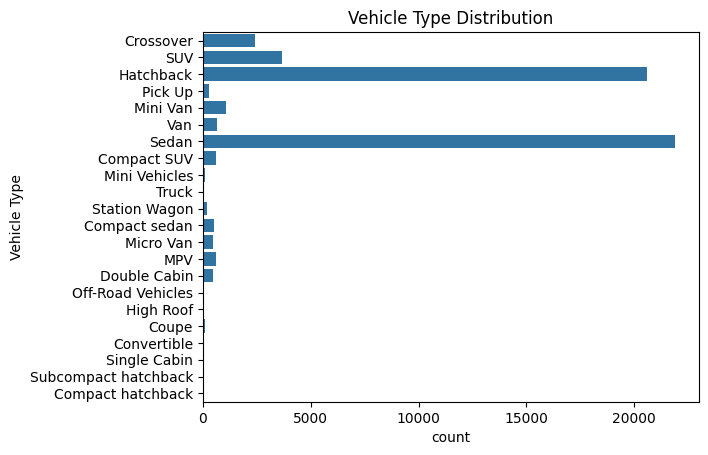

In [26]:
sns.countplot(y=ads_df['Vehicle Type'])
plt.title('Vehicle Type Distribution')
plt.show()

**b. Transmission Distribution**

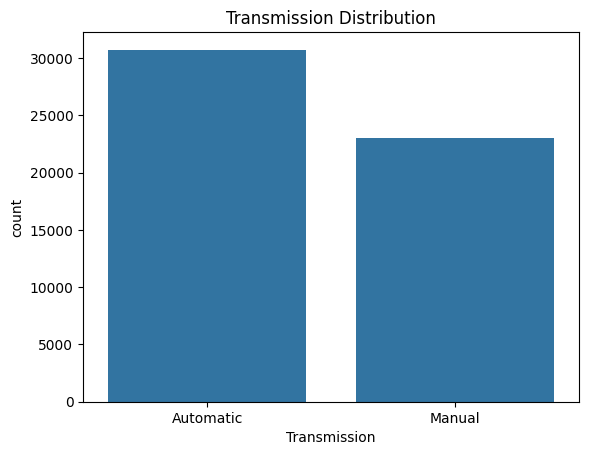

In [32]:
sns.countplot(x=ads_df['Transmission'])
plt.title('Transmission Distribution')
plt.show()

**c. Engine Type Distribution**

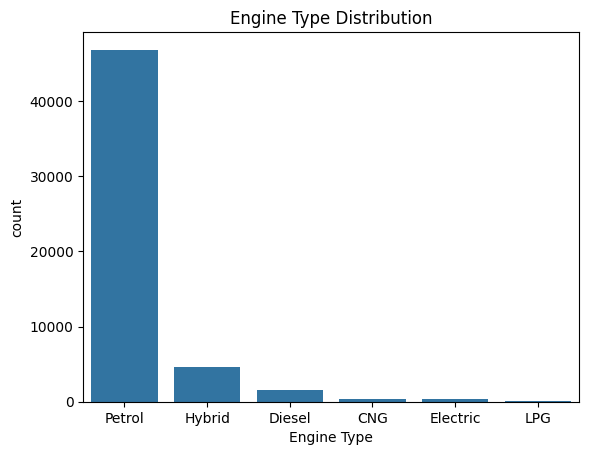

In [43]:
sns.countplot(x=ads_df['Engine Type'])
plt.title('Engine Type Distribution')
plt.show()

**d. Distribution of Mileage**

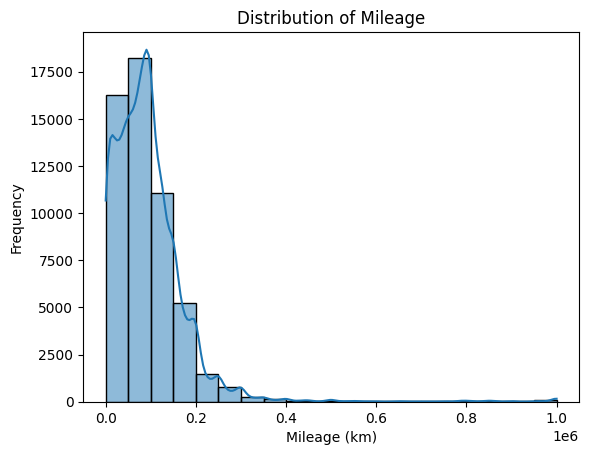

In [49]:
sns.histplot(ads_df['Mileage'].astype(str).str.replace(r'km|,', '', regex=True).astype(int), kde=True, bins=20)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Frequency')
plt.show()

**e. Correlation between numerical features**

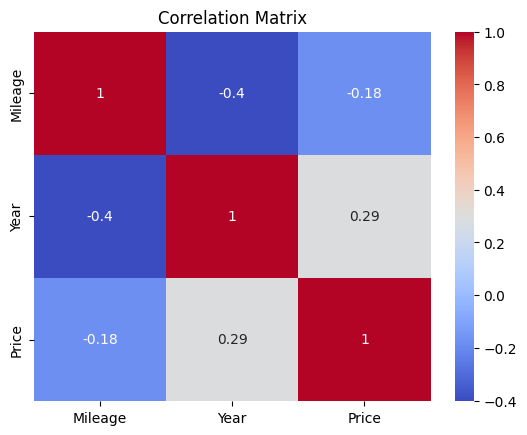

In [116]:
units = ads_df['Price'].str.split('\n').str[0].str.replace('PKR', '').str.split(' ').str[-1]
value = ads_df['Price'].str.split('\n').str[0].str.replace('PKR', '').str.strip().str.split(' ').str[0]

data = pd.DataFrame({
    'Year': ads_df.loc[units != 'price', 'Model'],
    'Price': value[units != 'price'].astype(float) * units[units != 'price'].apply(lambda x: 10**5 if 'lacs' in x else 10**7 if 'crore' in x else x),
    'Mileage': ads_df.loc[units != 'price', 'Mileage'].astype(str).str.replace(r'km|,', '', regex=True).astype(int)
})

numerical_cols = ['Mileage', 'Year', 'Price']  
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

**f. Demand Analysis: Ad Frequency by Age Range**

*Categorizes vehicles based on their age and visualizes the frequency of ads in each category*

/var/folders/md/3qtr0hg57rvdx_k4yclxffgw0000gn/T/ipykernel_24155/731153645.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_demand, x='Age Range', y='Ad Count', palette='viridis')


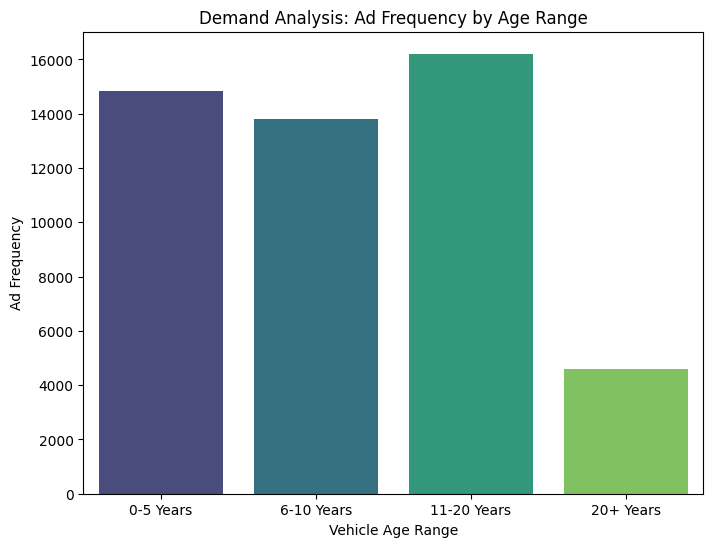

In [99]:
# Define age categories
ads_df['Age'] = 2024 - ads_df['Year']
ads_df['Model Category'] = pd.cut(ads_df['Age'], bins=[0, 5, 10, 20, 50], labels=['0-5 Years', '6-10 Years', '11-20 Years', '20+ Years'])

# Count the number of ads in each category
model_demand = ads_df['Model Category'].value_counts().reset_index()
model_demand.columns = ['Age Range', 'Ad Count']

plt.figure(figsize=(8, 6))
sns.barplot(data=model_demand, x='Age Range', y='Ad Count', palette='viridis')
plt.title('Demand Analysis: Ad Frequency by Age Range')
plt.xlabel('Vehicle Age Range')
plt.ylabel('Ad Frequency')
plt.show()

#### Feature Cleaning and Transformation

#####  **a. Convert Mileage to numeric (removing "km")**

In [501]:
ads_df['Mileage'] = ads_df['Mileage'].astype(str).str.replace(r'km|,', '', regex=True).astype(int)

##### **b. Extract year from Model (assuming it's a year)**

In [504]:
ads_df['Model'] = ads_df['Model'].astype(int)
ads_df.rename(columns={'Model': 'Year'}, inplace=True)

##### **c. Convert Price to numeric (removing "lacs, crore")**

*Removing Entries with 'Call for Price'*

In [506]:
units = ads_df['Price'].str.split('\n').str[0].str.replace('PKR', '').str.split(' ').str[-1]
value = ads_df['Price'].str.split('\n').str[0].str.replace('PKR', '').str.strip().str.split(' ').str[0]

ads_df = ads_df[units != 'price']

print(f"Number of rows after removal: {ads_df.shape[0]}")

Number of rows after removal: 53194


In [507]:
ads_df['Price'] = value[units != 'price'].astype(float) * units[units != 'price'].apply(lambda x: 10**5 if 'lacs' in x else 10**7 if 'crore' in x else x)

*Displaying statistics to verify*

In [508]:
ads_df.describe()

,Featured,Year,Mileage,Price
count,53194.000000,53194.000000,53194.000000,5.319400e+04
mean,0.154266,2013.514682,95730.678911,4.182650e+06
std,0.361206,7.670105,87612.496904,6.301684e+06
min,0.000000,1951.000000,1.000000,1.250000e+05
25%,0.000000,2009.000000,42224.750000,1.650000e+06
50%,0.000000,2015.000000,85000.000000,2.890000e+06
75%,0.000000,2020.000000,125000.000000,4.550000e+06
max,1.000000,2024.000000,1000000.000000,3.375000e+08


##### **d. Extract city, province from Location**

In [509]:
# Load the list of city names from a JSON file
with open(os.path.join('json', 'pak_city_names.json'), 'r') as f:
    cities_list = loads(f.read())

# Define the list of provinces in Pakistan
provinces = ['KPK', 'Punjab', 'Sindh', 'Islamabad', 'Balochistan', 'Azad Kashmir']

# Function to retrieve city from input text
def retrieve_city(input):
    for city in cities_list:
        if city['name'].lower() in input.lower():
            return city['name']
    
    return ''

# Function to retrieve province from input text
def retrieve_province(input):
    for province in provinces:
        if province.lower() in input.lower():
            return province
    
    return ''

*Apply the retrieve_city, retrieve_city function to extract cities from the 'Location' column*

In [510]:
ads_df['Province'] = ads_df['Location'].apply(retrieve_province)
ads_df['City'] = ads_df['Location'].apply(retrieve_city)

*Display the first few rows to verify the new columns*

In [511]:
ads_df[['Location', 'Province', 'City']].sample(5)

,Location,Province,City
Ad Ref,,,
9281853,"Gulshan-e-Iqbal, Karachi Sindh",Sindh,Karachi
9328058,Sheikhupura Punjab,Punjab,
8972475,"Central Park Housing Scheme, Lahore Punjab",Punjab,Lahore
9267714,"Baldia Town, Karachi Sindh",Sindh,Karachi
9225163,"Manzoor Colony, Karachi Sindh",Sindh,Karachi


*Removing Entries with no matching*

In [512]:
ads_df = ads_df[ads_df['Province'] != '']
ads_df = ads_df[ads_df['City'] != '']

print(f"Number of rows after removal: {ads_df.shape[0]}")

Number of rows after removal: 50652


*Visualizing distribution of ads by province*

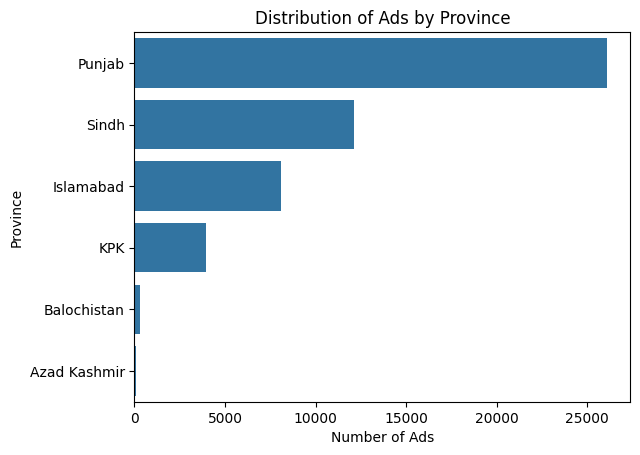

In [513]:
sns.barplot(y=ads_df['Province'].value_counts().index, x=ads_df['Province'].value_counts().values)
plt.title('Distribution of Ads by Province')
plt.xlabel('Number of Ads')
plt.ylabel('Province')
plt.show()

##### **e. Extracting individual features from 'Features' Column**

*Split the features into individual components (if stored as a list-like string)*

In [514]:
ads_df['Features'] = ads_df['Features'].apply(lambda x: eval(x) if isinstance(x, str) else x)

*Create a set of all unique features in the dataset*

In [515]:
unique_features = set()
ads_df['Features'].dropna().apply(lambda x: unique_features.update(x))
print(f"Total unique features: {len(unique_features)}")
print(unique_features)

Total unique features: 28
{'Keyless Entry', 'Power Locks', 'Sun Roof', 'Rear Seat Entertainment', 'Alloy Rims', 'USB and Auxillary Cable', 'Immobilizer Key', 'Cassette Player', 'Rear Speakers', 'ABS', 'AM/FM Radio', 'Cruise Control', 'CoolBox', 'Power Mirrors', 'Rear AC Vents', 'Air Conditioning', 'CD Player', 'Heated Seats', 'Steering Switches', 'DVD Player', 'Navigation System', 'Air Bags', 'Climate Control', 'Front Speakers', 'Power Windows', 'Front Camera', 'Rear Camera', 'Power Steering'}


*Create binary columns for each unique feature*

In [516]:
for feature in unique_features:
    ads_df[feature] = ads_df['Features'].apply(lambda x: 1 if isinstance(x, list) and feature in x else 0)

*Removing Entries with no features*

In [517]:
print(f"Number of rows without any features: {ads_df['Features'].isnull().sum()}")
ads_df['Features'].dropna(inplace=True)

Number of rows without any features: 0


In [518]:
all_features = [feature for features_list in ads_df['Features'] for feature in features_list]
feature_counts = Counter(all_features)

feature_counts_df = pd.DataFrame(feature_counts.items(), columns=['Feature', 'Count']).sort_values(by='Count', ascending=False)

*Determining the top 10 features*

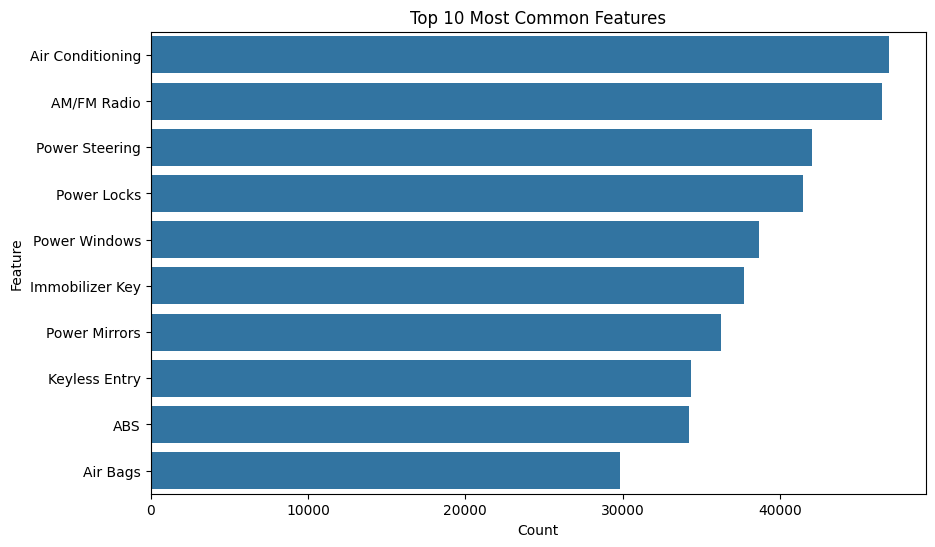

In [519]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_counts_df.head(10), x='Count', y='Feature')
plt.title('Top 10 Most Common Features')
plt.xlabel('Count')
plt.ylabel('Feature')
plt.show()

##### **f. Extracting fine grained details from 'Details' Column**

*Ensure the 'Details' column is parsed as a dictionary*

In [520]:
ads_df['Details'] = ads_df['Details'].apply(eval) 

*Create new columns for each key in the dictionary*

In [521]:
details_keys = set().union(*(d.keys() for d in ads_df['Details'].dropna()))

for key in details_keys:
    ads_df[key] = ads_df['Details'].apply(lambda x: x.get(key) if isinstance(x, dict) else None)

*Verify the new columns*

In [522]:
ads_df[list(details_keys)].sample(1)

,Import Date,Last Updated:,Registered In,Battery Capacity,Auction Grade,Color,Body Type,Chassis No.,Engine Capacity,Assembly
Ad Ref,,,,,,,,,,
9317380,None,"Oct 15, 2024",Lahore,None,None,Grey,Sedan,None,1600 cc,Local


##### **g. Reforming Vehicle Type Distribution**

*Replace specific vehicle type values with unified categories*

In [523]:
ads_df['Vehicle Type'] = ads_df['Vehicle Type'].replace({
    'Micro Van': 'Van/Mini Van',
    'Mini Van': 'Van/Mini Van',
    'Van': 'Van/Mini Van',
    'Compact sedan': 'Sedan',
    'Compact SUV': 'SUV',
    'Compact hatchback': 'Wagon/Hatchback',
    'Station Wagon': 'Wagon/Hatchback',
    'Subcompact hatchback': 'Wagon/Hatchback',
    'Single Cabin': 'Truck',
    'Double Cabin': 'Truck',
    'Coupe': 'Coupe/Convertible',
    'Convertible': 'Coupe/Convertible',
    'Off-Road Vehicles': 'SUV'
})

ads_df['Vehicle Type'].value_counts()

Vehicle Type
Sedan                21057
Hatchback            19496
SUV                   4002
Crossover             2293
Van/Mini Van          1994
MPV                    582
Truck                  495
Pick Up                253
Wagon/Hatchback        195
Coupe/Convertible      125
Mini Vehicles          113
High Roof               47
Name: count, dtype: int64

*Visualize the updated distribution of Vehicle Types*

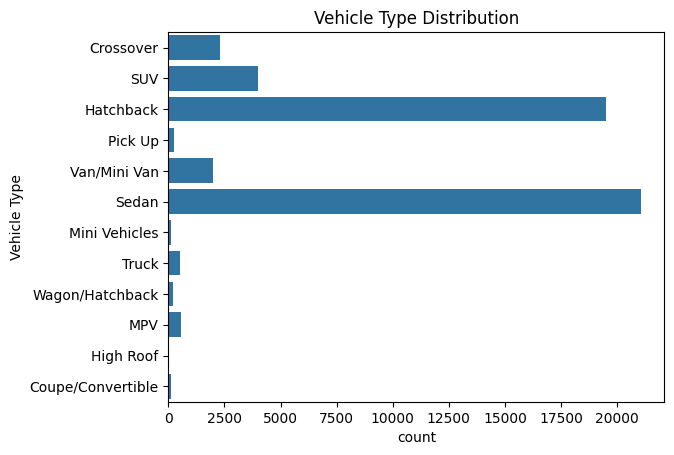

In [524]:
sns.countplot(y=ads_df['Vehicle Type'])
plt.title('Vehicle Type Distribution')
plt.show()

##### **h. Categorizing seller's status**

*Apply the function to the 'Seller Details' column and create a new 'Dealer' column*

In [525]:
def membership_status(details):
    if "Member Since" in details:
        return 1
    else:
        return 0

ads_df['Dealer'] = ads_df['Seller Details'].apply(membership_status)

*Visualize the distribution of dealers vs non-dealers*

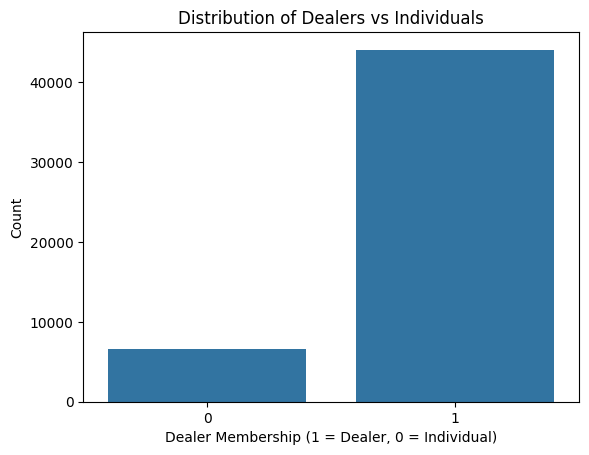

In [526]:
sns.countplot(data=ads_df, x='Dealer')
plt.title('Distribution of Dealers vs Individuals')
plt.xlabel('Dealer Membership (1 = Dealer, 0 = Individual)')
plt.ylabel('Count')
plt.show()

##### **i. Extracting Vehicle Make and Model**

In [527]:
# Load the make and model list from a JSON file
with open(os.path.join('json', 'make_model_list.json'), 'r') as f:
    make_model_list = loads(f.read())

# function to extract the make from the vehicle name
def extract_make(name):
    match = re.match(r'^\w+', name)
    return match.group(0)

# function to extract the model based on the make
def extract_model(vehicle_name, brand):
    models = next((item['models'] for item in make_model_list if item['make'].lower() == brand.lower()), [])
    for model in models:
        if re.search(r'\b' + re.escape(model) + r'\b', vehicle_name, re.IGNORECASE):
            return model
    return None

# Apply the functions to extract Make and Model
ads_df['Make'] = ads_df['Vehicle'].apply(extract_make)
ads_df['Model'] = ads_df.apply(lambda x: extract_model(x['Vehicle'], x['Make']), axis=1)

*Verify the new columns*

In [528]:
ads_df['Model'].dropna(inplace=True)
ads_df[['Vehicle', 'Make', 'Model']].sample(5)

,Vehicle,Make,Model
Ad Ref,,,
9286668,Lexus LX Series LX 600 Ultra Luxury 2022,Lexus,LX Series
9281660,Suzuki Cultus VXRi (CNG) 2008,Suzuki,Cultus
9257752,Suzuki Margalla GL 1995,Suzuki,Margalla
9220077,Suzuki Alto VXR 2023,Suzuki,Alto
9172904,Suzuki Mehran VXR Euro II 2015,Suzuki,Mehran


*Visualizing the distribution of manufacturers with most ads listings*

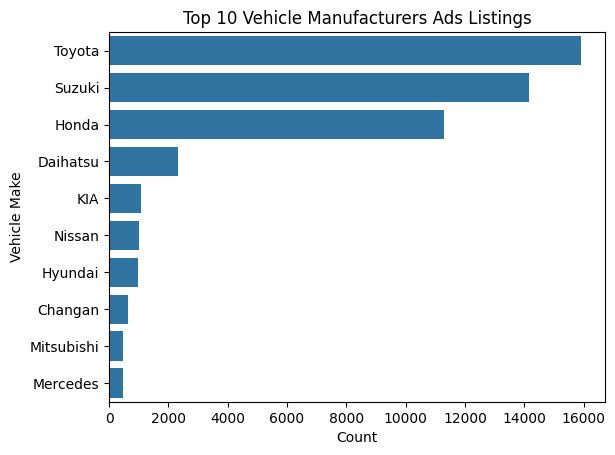

In [529]:
top_makes = ads_df['Make'].value_counts().head(10)
sns.barplot(y=top_makes.index, x=top_makes.values)
plt.title('Top 10 Vehicle Manufacturers Ads Listings')
plt.xlabel('Count')
plt.ylabel('Vehicle Make')
plt.show()

#### Feature Selection and Finalized Dataset

*Dropping unnecessary columns*

In [530]:
ads_df.drop(columns=[
    'url',
    'Location',
    'Features',
    'Details',
    'Seller Details',
    'Seller\'s Comments',
    'Last Updated:',
    'Auction Grade',
    'Body Type',
    'Chassis No.'
], axis=1, inplace=True)

In [531]:
ads_df = ads_df[['Make', 'Model', 'Vehicle', 'Year', 'Vehicle Type', 'Mileage',
       'Engine Type', 'Transmission', 'Price', 'City', 'Province',
       'Keyless Entry', 'Power Locks', 'Sun Roof', 'Rear Seat Entertainment',
       'Alloy Rims', 'USB and Auxillary Cable', 'Immobilizer Key',
       'Cassette Player', 'Rear Speakers', 'ABS', 'AM/FM Radio',
       'Cruise Control', 'CoolBox', 'Power Mirrors', 'Rear AC Vents',
       'Air Conditioning', 'CD Player', 'Heated Seats', 'Steering Switches',
       'DVD Player', 'Navigation System', 'Air Bags', 'Climate Control',
       'Front Speakers', 'Power Windows', 'Front Camera', 'Rear Camera',
       'Power Steering', 'Import Date', 'Registered In', 'Battery Capacity',
       'Color', 'Engine Capacity', 'Assembly', 'Dealer', 'Featured']]

ads_df.sample(3)

,Make,Model,Vehicle,Year,Vehicle Type,Mileage,Engine Type,Transmission,Price,City,...,Rear Camera,Power Steering,Import Date,Registered In,Battery Capacity,Color,Engine Capacity,Assembly,Dealer,Featured
Ad Ref,,,,,,,,,,,,,,,,,,,,,
9274774,Toyota,Yaris,Toyota Yaris GLI MT 1.3 2022,2022,Sedan,10000,Petrol,Manual,3980000.0,Sahiwal,...,0,1,None,Punjab,None,Super White,1300 cc,Local,1,0
9275584,Toyota,Aqua,Toyota Aqua L 2015,2015,Hatchback,130000,Hybrid,Automatic,4125000.0,Lahore,...,0,1,None,Punjab,None,White,1500 cc,Imported,0,0
9255177,Suzuki,Bolan,Suzuki Bolan VX Euro II 2017,2017,Van/Mini Van,31000,Petrol,Manual,1100000.0,Karachi,...,0,0,None,Karachi,None,Solid White,800 cc,Local,1,0


*Saving Processed Data*

In [532]:
# Save the cleaned and processed dataset to a new CSV file
ads_df.to_csv('cleaned datasets/dataset_1.csv')

### User Reviews Dataset

#### Loading the Dataset

In [56]:
reviews_df = pd.read_csv(os.path.join('datasets', 'dataset_2.csv'))

# Dropping duplicates if any
reviews_df.drop_duplicates()

# Displaying the first few rows to understand the structure of the data
reviews_df.head(3)

,make,model,car_model,review_title,reviewer_info,familiarity,review_text,style,comfort_rating,fuel_economy,perfomance,value_for_money,overall_rating,helpful_votes
0,Toyota,Corolla,Toyota Corolla 2.0D Saloon,Diesel Corrola,"Posted by Basharat on Jan 31, 2011",NaN,Most of the people runaway from diesel technol...,3 rating,2 rating,3 rating,5 rating,5 rating,4.0,(10 out of 15 people found this review helpful)
1,Honda,Civic,2016 Honda Civic Turbo 1.5 VTEC CVT,Adequate,"Posted by Awais Yousaf on Sep 27, 2016","Familiarity: I did not own this car, but have ...",This is a great looking car with a very nice i...,5 rating,4 rating,3 rating,4 rating,2 rating,3.0,(4 out of 4 people found this review helpful)
2,Hyundai,Tucson,2014 Hyundai Tucson,great if not ridden in pakistan,"Posted by Anonymous on Jul 26, 2017",Familiarity: I owned this car.,The exterior of the car is not great but its n...,3 rating,5 rating,5 rating,3 rating,3 rating,3.0,(1 out of 4 people found this review helpful)


#### Display basic information about the dataset

In [5]:
reviews_df.dtypes

make                object
model               object
car_model           object
review_title        object
reviewer_info       object
familiarity         object
review_text         object
style               object
comfort_rating      object
fuel_economy        object
perfomance          object
value_for_money     object
overall_rating     float64
helpful_votes       object
dtype: object

#### Check for missing values

In [6]:
reviews_df.isnull().sum()

make                 0
model                0
car_model            0
review_title         0
reviewer_info        0
familiarity        768
review_text          9
style                0
comfort_rating       0
fuel_economy         0
perfomance           0
value_for_money      0
overall_rating       9
helpful_votes        0
dtype: int64

#### Summary statistics of numerical columns

In [7]:
reviews_df.describe()

,overall_rating
count,4766.000000
mean,3.678976
std,1.050142
min,0.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


#### Check unique values for each column

In [8]:
for column in reviews_df.columns:
    print(f"{column}: {reviews_df[column].nunique()} unique values")

make: 47 unique values
model: 241 unique values
car_model: 1767 unique values
review_title: 3901 unique values
reviewer_info: 4457 unique values
familiarity: 4 unique values
review_text: 4713 unique values
style: 6 unique values
comfort_rating: 6 unique values
fuel_economy: 6 unique values
perfomance: 6 unique values
value_for_money: 6 unique values
overall_rating: 6 unique values
helpful_votes: 171 unique values


#### Feature Cleaning and Transformation

#####  **a. Clean Numerical Columns**

*Extract numeric values from columns like comfort_rating, fuel_economy, performance, value_for_money, and overall_rating by removing " rating" and casting them to integers.*

In [57]:
for column in ['style', 'comfort_rating', 'fuel_economy', 'perfomance', 'value_for_money']:
    reviews_df[column] = reviews_df[column].str.replace('rating', '').str.strip().astype(int)

*Drop rows where 'overall_rating' is NaN*

In [58]:
reviews_df = reviews_df.dropna(subset=['overall_rating'])
reviews_df['overall_rating'] = reviews_df['overall_rating'].astype(int)

*Displaying statistics to verify*

In [59]:
reviews_df.describe()

,style,comfort_rating,fuel_economy,perfomance,value_for_money,overall_rating
count,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000
mean,4.059379,3.977549,3.925724,4.078682,3.966849,3.678976
std,1.197075,1.237792,1.222705,1.242775,1.313803,1.050142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#####  **b. Process helpful votes**

In [60]:
reviews_df['helpful_votes_ratio'] = reviews_df['helpful_votes'].str.extract(r'(\d+)\s+out\s+of\s+(\d+)').astype(float).apply(lambda x: x[0] / x[1], axis=1)
reviews_df['helpful_votes_ratio'].fillna(0, inplace=True)

/var/folders/md/3qtr0hg57rvdx_k4yclxffgw0000gn/T/ipykernel_24155/4088841503.py:1: RuntimeWarning: invalid value encountered in scalar divide
  reviews_df['helpful_votes_ratio'] = reviews_df['helpful_votes'].str.extract(r'(\d+)\s+out\s+of\s+(\d+)').astype(float).apply(lambda x: x[0] / x[1], axis=1)


#####  **c. Extract date from reviewer info**

In [61]:
def extract_date(date_string):
    return datetime.strptime(date_string, "%b %d, %Y")

reviews_df['review_date'] = reviews_df['reviewer_info'].str.split(' on ').str[-1].str.strip().apply(extract_date)

#####  **d. Removing extra spaces from string columns**

In [62]:
reviews_df['review_title'] = reviews_df['review_title'].str.strip()
reviews_df['review_text'] = reviews_df['review_text'].str.strip()

#### Feature Selection and Finalized Dataset

*Dropping unnecessary columns*

In [63]:
reviews_df.drop(columns=[
    'reviewer_info',
    'helpful_votes',
    'familiarity'
], inplace=True)

In [64]:
reviews_df.head(3)

,make,model,car_model,review_title,review_text,style,comfort_rating,fuel_economy,perfomance,value_for_money,overall_rating,helpful_votes_ratio,review_date
0,Toyota,Corolla,Toyota Corolla 2.0D Saloon,Diesel Corrola,Most of the people runaway from diesel technol...,3,2,3,5,5,4,0.666667,2011-01-31
1,Honda,Civic,2016 Honda Civic Turbo 1.5 VTEC CVT,Adequate,This is a great looking car with a very nice i...,5,4,3,4,2,3,1.000000,2016-09-27
2,Hyundai,Tucson,2014 Hyundai Tucson,great if not ridden in pakistan,The exterior of the car is not great but its n...,3,5,5,3,3,3,0.250000,2017-07-26


*Saving Processed Data*

In [65]:
# Save the cleaned and processed dataset to a new CSV file
reviews_df.to_csv('cleaned datasets/dataset_2.csv', index=False)

#### EDA on key columns

**a. Distribution of Ratings**

/var/folders/md/3qtr0hg57rvdx_k4yclxffgw0000gn/T/ipykernel_24155/3286417937.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ratings, x='Rating Category', y='Rating', palette='muted', inner='quartile')


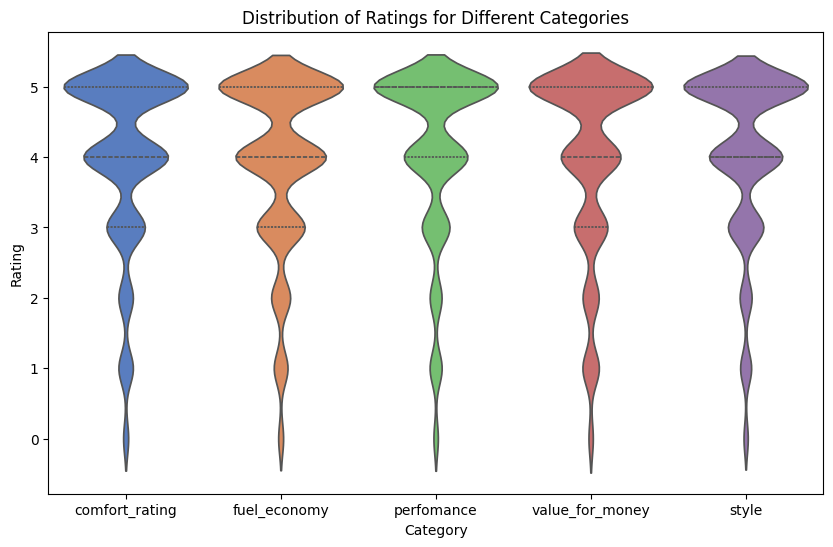

In [79]:
ratings = reviews_df.melt(value_vars=['comfort_rating', 'fuel_economy', 'perfomance', 'value_for_money', 'style'], 
                          var_name='Rating Category', value_name='Rating')

# Plotting the violin plot for all categories
plt.figure(figsize=(10, 6))
sns.violinplot(data=ratings, x='Rating Category', y='Rating', palette='muted', inner='quartile')
plt.title('Distribution of Ratings for Different Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

**b. Review Trends Over Time**

*Analyze the number of reviews submitted each year*

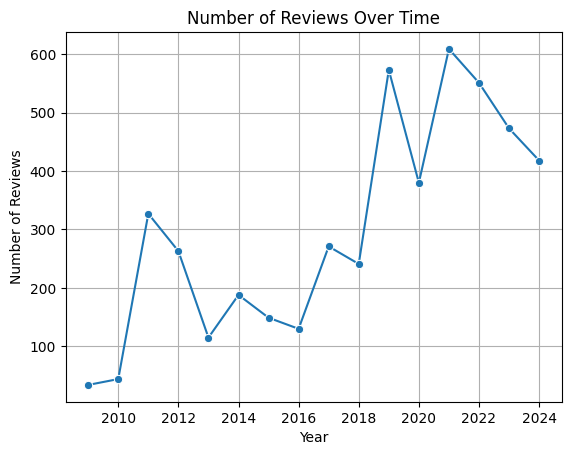

In [82]:
reviews_df['review_year'] = reviews_df['review_date'].dt.year

# Count the number of reviews per year
reviews_per_year = reviews_df['review_year'].value_counts().sort_index()

# Plot the number of reviews over time
sns.lineplot(x=reviews_per_year.index, y=reviews_per_year.values, marker='o')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

**c. Sentiment Analysis Preparation**

*Conduct sentiment analysis using the Review Title/ Text column by visualizing the word frequency or performing text analysis.*

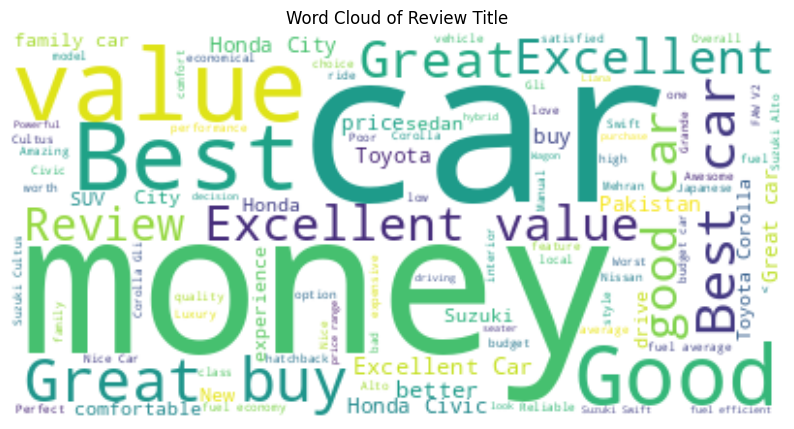

In [87]:
text = " ".join(review for review in reviews_df['review_title'])
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Review Title')
plt.show()

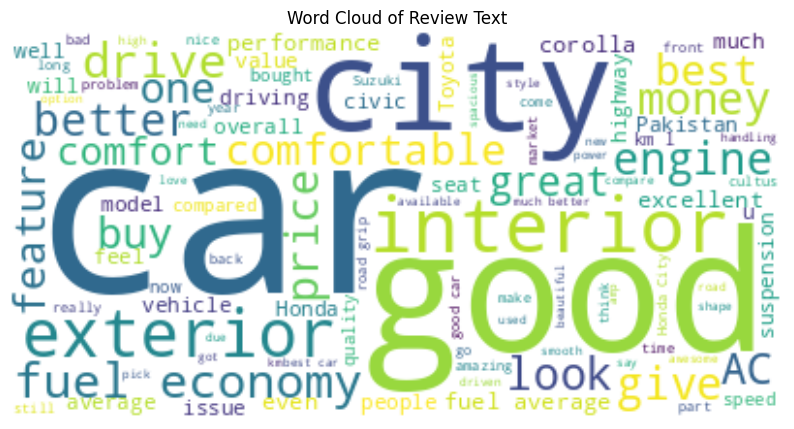

In [102]:
text = " ".join(review for review in reviews_df['review_text'])
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Review Text')
plt.show()

**d. Scatter Plots of Individual Ratings vs Overall Rating**

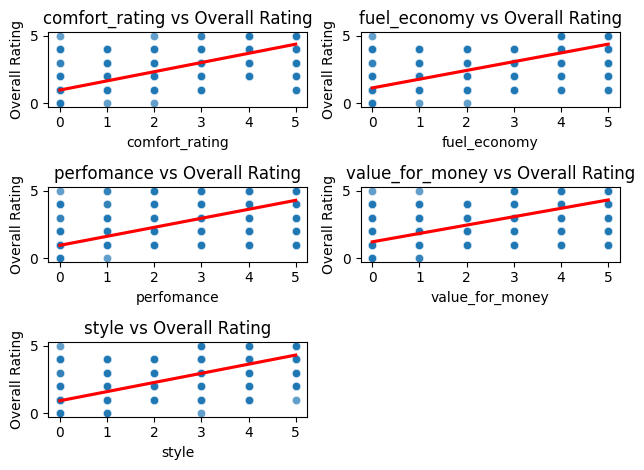

In [93]:
correlation_columns = ['comfort_rating', 'fuel_economy', 'perfomance', 'value_for_money', 'style']

# Plot scatter plots for each column against 'overall_rating'
for i, col in enumerate(correlation_columns, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=reviews_df, x=col, y='overall_rating', alpha=0.7)
    sns.regplot(data=reviews_df, x=col, y='overall_rating', scatter=False, color='red', ci=None)  # Add regression line
    plt.title(f'{col} vs Overall Rating')
    plt.xlabel(col)
    plt.ylabel('Overall Rating')

plt.tight_layout()
plt.show()

**e. Manufacturers by Review Count**

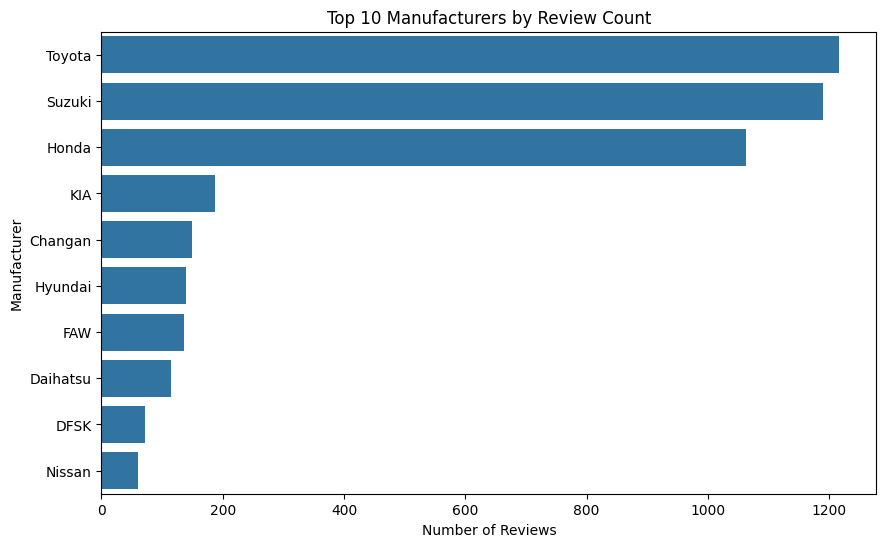

In [101]:
top_10_manufacturers = reviews_df['make'].value_counts().head(10).reset_index()
top_10_manufacturers.columns = ['Manufacturer', 'Review Count']

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_manufacturers, x='Review Count', y='Manufacturer')
plt.title('Top 10 Manufacturers by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Manufacturer')
plt.show()

## Machine Learning

### Loading the Dataset

In [210]:
ads_df = pd.read_csv(os.path.join('cleaned datasets', 'dataset_1.csv'))
ads_df.head()

,Ad Ref,Make,Model,Vehicle,Year,Vehicle Type,Mileage,Engine Type,Transmission,Price,...,Rear Camera,Power Steering,Import Date,Registered In,Battery Capacity,Color,Engine Capacity,Assembly,Dealer,Featured
0,9307635,MG,HS,MG HS Trophy 2021,2021,Crossover,31500,Petrol,Automatic,6650000.0,...,0,1,NaN,Punjab,NaN,Pearl White Metallic,1500 cc,Imported,1,1
1,9233999,BMW,X1,BMW X1 sDrive18i 2017,2017,Crossover,70000,Petrol,Automatic,6800000.0,...,0,1,NaN,Islamabad,NaN,Alpine White,1500 cc,Local,1,0
2,9259914,Toyota,Land Cruiser,Toyota Land Cruiser ZX 2022,2022,SUV,30,Petrol,Automatic,73500000.0,...,0,1,NaN,Un-Registered,NaN,White,4600 cc,Imported,0,1
3,9241391,Suzuki,Swift,Suzuki Swift DLX 1.3 Navigation 2018,2018,Hatchback,100000,Petrol,Manual,2750000.0,...,0,1,NaN,Islamabad,NaN,Graphite Grey,1300 cc,Local,1,0
4,9238264,Suzuki,Carry,Suzuki Mega Carry Xtra Manual 2019,2019,Pick Up,1,Petrol,Manual,3500000.0,...,0,0,NaN,Karachi,NaN,Snow White Pearl,1500 cc,Local,1,0


### Preparing Dataset

**Cleaning Numerical Columns**

*Engine Capacity:* The Engine Capacity column initially contained strings such as "1500 cc". These were cleaned by removing the cc unit, and then converting the values to float for numerical analysis.
*Battery Capacity:* Similarly, the Battery Capacity column, which included values like "60.0 kWh", was cleaned by removing the kWh unit, and then converting the values to float for numerical analysis.

In [211]:
ads_df['Engine Capacity'] = ads_df['Engine Capacity'].str.replace('cc', '').str.strip().astype(float) # cc
ads_df['Battery Capacity'] = ads_df['Battery Capacity'].str.replace('kWh', '').str.strip().astype(float) # kWh

**Encoding Categorical Variables + Removing Unnecessary Columns**

In [212]:
one_hot_cols = ['Engine Type', 'Transmission', 'Assembly', 'Vehicle Type']
remove_cols = ['Ad Ref', 'Make', 'Model', 'Vehicle', 'Import Date', 'Registered In', 'Color', 'City', 'Province']

data = ads_df.apply(lambda col: col.astype(bool) if col.dtype == 'int' and col.isin([0, 1]).all() else col)
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=False)
data.drop(columns=remove_cols, inplace=True)

In [213]:
data.head()

,Year,Mileage,Price,Keyless Entry,Power Locks,Sun Roof,Rear Seat Entertainment,Alloy Rims,USB and Auxillary Cable,Immobilizer Key,...,Vehicle Type_Hatchback,Vehicle Type_High Roof,Vehicle Type_MPV,Vehicle Type_Mini Vehicles,Vehicle Type_Pick Up,Vehicle Type_SUV,Vehicle Type_Sedan,Vehicle Type_Truck,Vehicle Type_Van/Mini Van,Vehicle Type_Wagon/Hatchback
0,2021,31500,6650000.0,True,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2017,70000,6800000.0,True,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2022,30,73500000.0,True,True,True,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
3,2018,100000,2750000.0,False,True,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
4,2019,1,3500000.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [214]:
data.dtypes

Year                                int64
Mileage                             int64
Price                             float64
Keyless Entry                        bool
Power Locks                          bool
Sun Roof                             bool
Rear Seat Entertainment              bool
Alloy Rims                           bool
USB and Auxillary Cable              bool
Immobilizer Key                      bool
Cassette Player                      bool
Rear Speakers                        bool
ABS                                  bool
AM/FM Radio                          bool
Cruise Control                       bool
CoolBox                              bool
Power Mirrors                        bool
Rear AC Vents                        bool
Air Conditioning                     bool
CD Player                            bool
Heated Seats                         bool
Steering Switches                    bool
DVD Player                           bool
Navigation System                 

In [215]:
data.describe()

,Year,Mileage,Price,Battery Capacity,Engine Capacity
count,50652.000000,50652.000000,5.065200e+04,296.000000,50356.000000
mean,2013.621496,94853.339177,4.263262e+06,124.184459,1372.033184
std,7.630979,86611.979453,6.433615e+06,314.139669,640.966008
min,1951.000000,1.000000,1.250000e+05,16.800000,100.000000
25%,2009.000000,42000.000000,1.680000e+06,60.000000,1000.000000
50%,2015.000000,84000.000000,2.950000e+06,71.000000,1300.000000
75%,2020.000000,125000.000000,4.602500e+06,93.400000,1600.000000
max,2024.000000,1000000.000000,3.375000e+08,4934.000000,7700.000000


Min-max scaling rescales the values to a range between 0 and 1 for **Mileage**

In [194]:
def normalize_data(col):
    return (col - col.min()) / (col.max() - col.min())

data['Mileage'] = normalize_data(data['Mileage'])
data['Battery Capacity'] = normalize_data(data['Battery Capacity'])
data['Engine Capacity'] = normalize_data(data['Engine Capacity'])

In [216]:
ss = StandardScaler()
columns_to_scale = ['Mileage', 'Battery Capacity', 'Engine Capacity', 'Price']
data[columns_to_scale] = ss.fit_transform(data[columns_to_scale])
data.head()

,Year,Mileage,Price,Keyless Entry,Power Locks,Sun Roof,Rear Seat Entertainment,Alloy Rims,USB and Auxillary Cable,Immobilizer Key,...,Vehicle Type_Hatchback,Vehicle Type_High Roof,Vehicle Type_MPV,Vehicle Type_Mini Vehicles,Vehicle Type_Pick Up,Vehicle Type_SUV,Vehicle Type_Sedan,Vehicle Type_Truck,Vehicle Type_Van/Mini Van,Vehicle Type_Wagon/Hatchback
0,2021,-0.731469,0.370983,True,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2017,-0.286953,0.394298,True,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2022,-1.094817,10.761822,True,True,True,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
3,2018,0.059423,-0.235214,False,True,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
4,2019,-1.095152,-0.118638,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


Repalcing Year column with number of years since the car was made (2024 as base line)

In [217]:
data['Year'] = 2024 - data['Year']

In [218]:
data.head()

,Year,Mileage,Price,Keyless Entry,Power Locks,Sun Roof,Rear Seat Entertainment,Alloy Rims,USB and Auxillary Cable,Immobilizer Key,...,Vehicle Type_Hatchback,Vehicle Type_High Roof,Vehicle Type_MPV,Vehicle Type_Mini Vehicles,Vehicle Type_Pick Up,Vehicle Type_SUV,Vehicle Type_Sedan,Vehicle Type_Truck,Vehicle Type_Van/Mini Van,Vehicle Type_Wagon/Hatchback
0,3,-0.731469,0.370983,True,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,7,-0.286953,0.394298,True,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2,-1.094817,10.761822,True,True,True,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
3,6,0.059423,-0.235214,False,True,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
4,5,-1.095152,-0.118638,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


### Linear Regression: Fuel Cars only

Since there is a mix of both electric and fuel cars in the dataset, it's necessary to filter the dataset to only include fuel-based cars for regression, as their price predictors (e.g., Engine Capacity, Mileage) differ significantly from those for electric cars.

In [219]:
fuel_cars_df = data[data['Engine Type_Electric'] == False].copy()
fuel_cars_df.drop(columns=['Engine Type_Electric', 'Battery Capacity'], inplace=True)

In [220]:
fuel_cars_df.describe()

,Year,Mileage,Price,Engine Capacity
count,50356.000000,50356.000000,50356.000000,5.035600e+04
mean,10.425868,0.005206,-0.021939,-1.446315e-16
std,7.627658,1.000482,0.934511,1.000010e+00
min,0.000000,-1.095152,-0.643231,-1.984576e+00
25%,4.000000,-0.598691,-0.402307,-5.804315e-01
50%,9.000000,-0.113765,-0.211899,-1.123833e-01
75%,15.000000,0.348069,0.048455,3.556649e-01
max,73.000000,10.450697,51.796700,9.872645e+00


**Removing Outliers (Using IQR):**

Identifying the outliers by calculating the IQR (Interquartile Range) and filtering out values that fall outside the acceptable range.

In [225]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = fuel_cars_df['Price'].quantile(0.25)
Q3 = fuel_cars_df['Price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define acceptable range for price
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the rows with outliers
fuel_cars_df = fuel_cars_df[(fuel_cars_df['Price'] >= lower_bound) & (fuel_cars_df['Price'] <= upper_bound)]

#### Train-Test Split

*80:20 train-test split*

In [226]:
X = fuel_cars_df.drop(columns=['Price'])  
y = fuel_cars_df['Price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Initializing the Linear Regression model

In [227]:
# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

LinearRegression()

In [228]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 0.011664765227423893
R² Score: 0.8618435090007744


#### Feature Importance

Analyze the coefficients of the linear regression model to interpret the most significant predictors of car price:

In [229]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                           Feature  Coefficient
51              Vehicle Type_Truck     0.233183
49                Vehicle Type_SUV     0.155287
43          Vehicle Type_Crossover     0.148906
30                 Engine Capacity     0.120771
13                  Cruise Control     0.078079
35              Engine Type_Hybrid     0.069705
42  Vehicle Type_Coupe/Convertible     0.064902
16                   Rear AC Vents     0.055201
19                    Heated Seats     0.049158
27                    Front Camera     0.041209
22               Navigation System     0.034190
11                             ABS     0.033412
45          Vehicle Type_High Roof     0.032315
23                        Air Bags     0.030121
32                        Featured     0.029621
38          Transmission_Automatic     0.028080
14                         CoolBox     0.023253
40               Assembly_Imported     0.021208
20               Steering Switches     0.015729
2                    Keyless Entry     0

#### Visualization

Plot the actual vs predicted prices to evaluate the model visually:

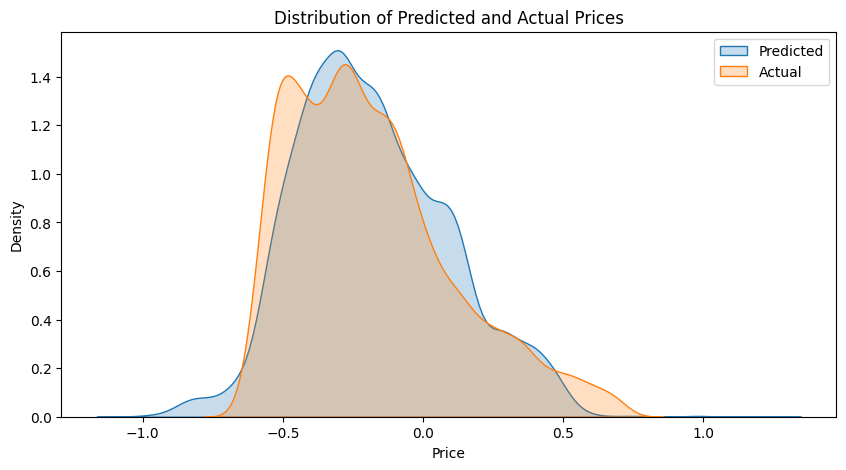

In [230]:
# plotting distribution of y_test and y_pred

plt.figure(figsize=(10, 5))
sns.kdeplot(y_pred, label='Predicted', fill=True)
sns.kdeplot(y_test, label='Actual', fill=True)
plt.title('Distribution of Predicted and Actual Prices')
plt.legend()
plt.show()

### Random Forest

#### Hyperparameter Tuning for Random Forest
To improve the performance of the Random Forest model, we performed hyperparameter tuning by varying two important parameters: 
- **`n_estimators`**: The number of trees in the forest.
- **`max_depth`**: The maximum depth of each tree.

The goal of this experiment is to identify the combination of these parameters that minimizes the **Root Mean Squared Error (RMSE)**, which provides a measure of the prediction error.

1. **Parameter Selection**:
   - **`n_estimators`**: We explored values `[10, 50, 100]` to observe the impact of increasing the number of trees.
   - **`max_depth`**: Values `[3, 5, 7]` were tested to evaluate the complexity of trees and its effect on model performance.

2. **Process**:
   - For each combination of `n_estimators` and `max_depth`, we trained a Random Forest model on the training dataset.
   - Predictions were made on the test dataset.
   - RMSE was calculated for each configuration and stored for analysis.


3. **Visualization**:
   - The results of this tuning process are visualized to better understand how the parameters influence model performance.

In [247]:
estimators_vals = [10, 50, 100]
max_depth_vals = [3, 5, 7]

rmse_results = []

for n_estimators in estimators_vals:
    for max_depth in max_depth_vals:
        random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        random_forest.fit(X_train, y_train)
        
        predictions = random_forest.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmse_results.append((n_estimators, max_depth, rmse))

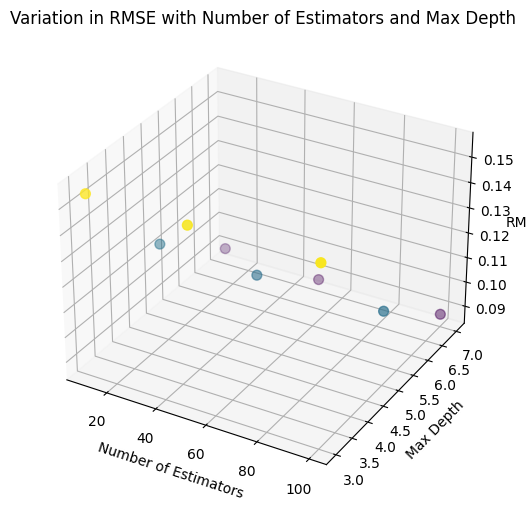

In [248]:
rmse_df = pd.DataFrame(rmse_results, columns=["n_estimators", "max_depth", "rmse"])
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rmse_df['n_estimators'], rmse_df['max_depth'], rmse_df['rmse'], c=rmse_df['rmse'], cmap='viridis', s=50)
ax.set_xlabel("Number of Estimators")
ax.set_ylabel("Max Depth")
ax.set_zlabel("RMSE")
ax.set_title("Variation in RMSE with Number of Estimators and Max Depth")
plt.show()

In [252]:
optimal_params = rmse_df.loc[rmse_df['rmse'].idxmin()]
optimal_params

n_estimators    50.000000
max_depth        7.000000
rmse             0.087813
Name: 5, dtype: float64

Based on the hyperparameter tuning results, we selected the configuration with:

- **`n_estimators = 50`**
- **`max_depth = 7`**

This combination yielded the **lowest RMSE of 0.0878**, indicating that this setup provides the best balance between model complexity and prediction accuracy among the tested configurations. This will be used as the final model parameters for the Random Forest Regressor.

In [253]:
random_forest = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=42)

random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=50, random_state=42)

In [255]:
y_pred = random_forest.predict(X_test)

# Evaluate
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 0.007711207410071038
R² Score: 0.9086691128049459


#### Cross-Validation

In [257]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
print(f"Average RMSE from Cross-Validation: {np.sqrt(-cv_scores.mean()):.4f}")

Average RMSE from Cross-Validation: 0.0897


#### Feature Importance

To understand which features contribute the most to the predictions:

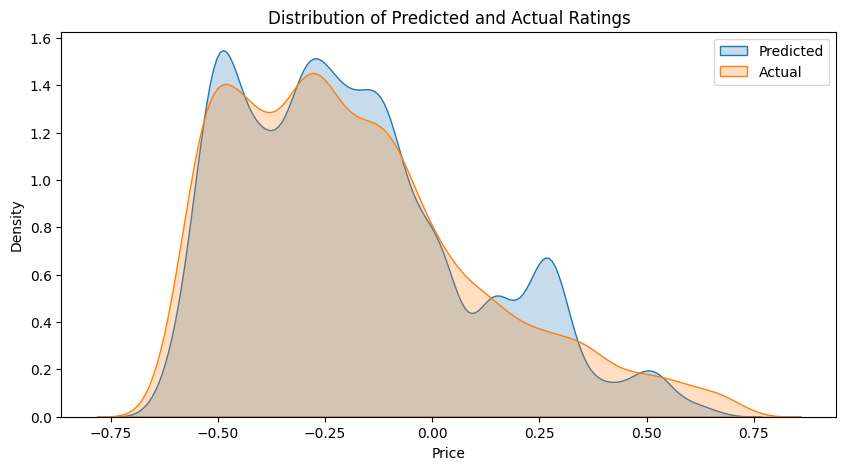

In [258]:
# plot distribution of y_test and y_pred

plt.figure(figsize=(10, 5))
sns.kdeplot(y_pred, label='Predicted', fill=True)
sns.kdeplot(y_test, label='Actual', fill=True)

plt.title('Distribution of Predicted and Actual Ratings')

plt.legend()

plt.show()

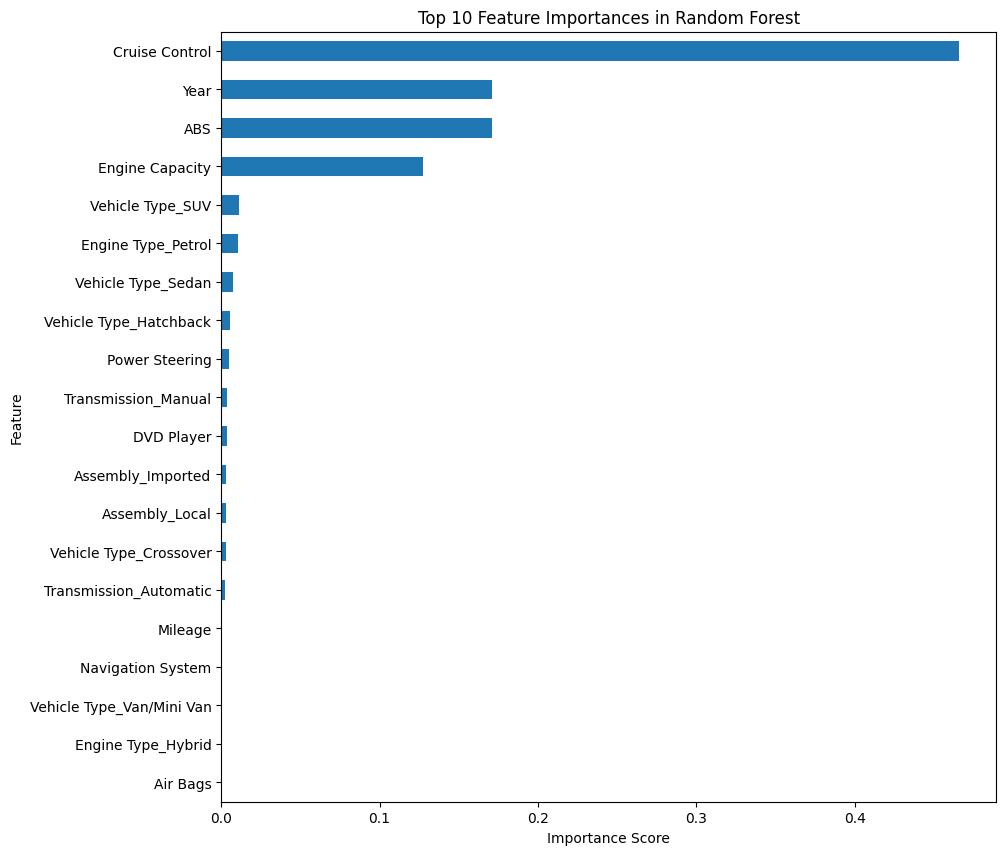

In [259]:
# Get feature importances
feature_importances = pd.Series(random_forest.feature_importances_, index=X.columns)

# Plot feature importances
plt.figure(figsize=(10, 10))
feature_importances.nlargest(20).sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Based on the feature importance analysis, it is evident that **Cruise Control** dominates the Random Forest model's interpretation of car pricing. However, this feature's high importance is likely a reflection of its correlation with luxury cars, which already command higher prices. To better understand the contributions of other features, it makes sense to drop **Cruise Control** from the dataset and re-run the model.

This approach will help us achieve a more balanced assessment of feature importance by reducing the bias introduced by luxury-specific indicators. By focusing on features like **Year**, **ABS**, **Engine Capacity**, and **Mileage**, we aim to identify the key factors that influence car resale value across a broader spectrum of vehicles. 

Next, we will:

1. Drop **Cruise Control** from the dataset.
2. Re-train the Random Forest model.
3. Re-evaluate the feature importance to observe any shifts in the ranking of other features.

This iterative refinement ensures a more robust understanding of the factors driving used car prices.

In [260]:
fuel_cars_df

,Year,Mileage,Price,Keyless Entry,Power Locks,Sun Roof,Rear Seat Entertainment,Alloy Rims,USB and Auxillary Cable,Immobilizer Key,...,Vehicle Type_Hatchback,Vehicle Type_High Roof,Vehicle Type_MPV,Vehicle Type_Mini Vehicles,Vehicle Type_Pick Up,Vehicle Type_SUV,Vehicle Type_Sedan,Vehicle Type_Truck,Vehicle Type_Van/Mini Van,Vehicle Type_Wagon/Hatchback
0,3,-0.731469,0.370983,True,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,7,-0.286953,0.394298,True,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,6,0.059423,-0.235214,False,True,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
4,5,-1.095152,-0.118638,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,12,1.041975,-0.455932,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50646,20,0.498165,-0.242986,True,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
50647,13,-0.021398,-0.254644,True,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
50649,19,3.484618,-0.507226,True,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
50650,27,0.636716,-0.530541,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [267]:
random_forest.fit(X_train.drop(columns=['ABS']), y_train)

y_pred = random_forest.predict(X_test.drop(columns=['ABS']))

In [268]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 0.007350016920912588
R² Score: 0.9129470223549048


##### Displaying Top and Lowest 10 Correlated Features with Car Price

To analyze the relationship between features and car prices, we computed the correlation coefficients of all features with the target variable (price). Correlation values range from -1 to 1, where:

Positive values indicate a direct relationship with price (higher feature values correspond to higher prices).

Negative values indicate an inverse relationship with price (higher feature values correspond to lower prices).

**Top 10 Correlated Features with Car Price**

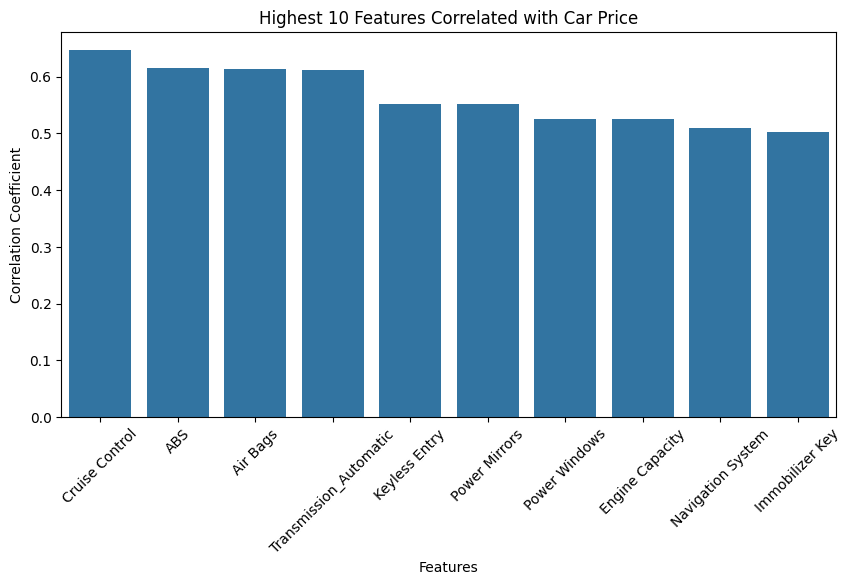

In [290]:
correlation = X.corrwith(y)
stong_correlation = correlation.sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 5))
sns.barplot(x=stong_correlation.index, y=stong_correlation.values)
plt.xticks(rotation=45)
plt.title('Highest 10 Features Correlated with Car Price')
plt.xlabel('Features') 
plt.ylabel('Correlation Coefficient') 
plt.show()

**Lowest 10 Correlated Features with Car Price**

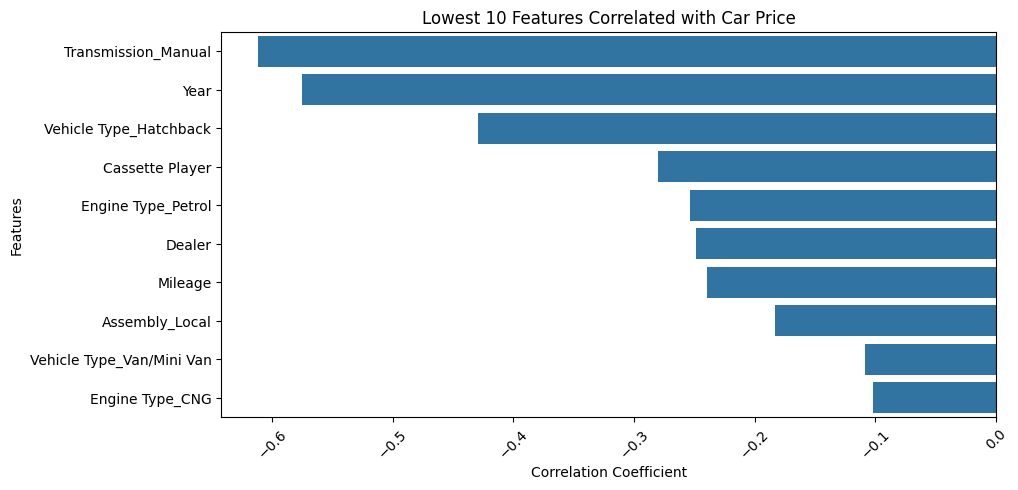

In [288]:
lowest_correlation = correlation.sort_values(ascending=True)[:10]
plt.figure(figsize=(10, 5))
sns.barplot(y=lowest_correlation.index, x=lowest_correlation.values)
plt.xticks(rotation=45)
plt.title('Lowest 10 Features Correlated with Car Price')
plt.ylabel('Features')
plt.xlabel('Correlation Coefficient')
plt.show()

Based on the provided graphs, we sought to answer the following question:

1. **What is the correlation between vehicle age and resale value?**
   - In the second graph, "Year" shows a negative correlation with resale value. This makes sense: as the car gets older (higher age), its resale value decreases. Newer cars (lower age) tend to command higher prices in the resale market. This is consistent with the general depreciation trend of vehicles.

2. **How significantly does mileage impact the final selling price?**
   - From the second graph, "Mileage" exhibits a slight negative correlation with resale value. This suggests that vehicles with higher mileage have somewhat lower resale prices, though the effect is not highly significant.

3. **To what extent does vehicle body type influence market value?**
   - The first graph includes "Vehicle Type" categories such as Sedan, SUV, and Hatchback. The relatively low appearance of body type categories in the highest correlations suggests that body type has a limited direct influence on resale value compared to other features. We will further explore the independent effect of "Vehichle Type". 

4. **What price variations exist between different fuel types and engine capacities?**
   - Given we have confined our analysis to fuel-powered cars, we sought to answer the effect of engine capacity only. "Engine Capacity" appears in the first graph with a moderately strong positive correlation. This implies that engine size plays a more significant role in determining resale value than the type of fuel used. This makes sense as well.

5. **How does the seller's status (Individual vs. Dealer) affect the final price?**
   - The second graph shows that "Dealer" has a low negative correlation with car price, indicating that vehicles sold by individuals may have slightly higher prices than those sold by dealers. However, the effect is minimal.

7. **Identify the most influential features affecting resale prices.**
   - The first graph highlights features such as "Cruise Control," "ABS," "Air Bags," and "Engine Capacity" as having strong positive correlations with resale value. These features are indicative of those provided by most luxury cars, which we know definitely have higher prices.

Overall, the graphs provide insights into the relationships between various features and car prices, addressing key aspects of the research questions.

### Decision Trees: Car Price Based on Vehicle Type

We aim to use a Decision Tree Regressor to predict car prices based solely on Vehicle Type. This will help us to answer:

**To what extent does vehicle body type influence market value?**

#### Extracting Relevant Features

We will focus on the following features:

- Price (target variable)
- Vehicle Type features (one-hot encoded columns starting with Vehicle Type_)

In [294]:
# Extract relevant features for analysis
vehicle_type_cols = [col for col in data.columns if col.startswith('Vehicle Type_')]
features = vehicle_type_cols
target = 'Price'

# Create a dataset with relevant features
X_vehicle_type = data[features]
y_vehicle_price = data[target]

In [295]:
X_vehicle_type.head()

,Vehicle Type_Coupe/Convertible,Vehicle Type_Crossover,Vehicle Type_Hatchback,Vehicle Type_High Roof,Vehicle Type_MPV,Vehicle Type_Mini Vehicles,Vehicle Type_Pick Up,Vehicle Type_SUV,Vehicle Type_Sedan,Vehicle Type_Truck,Vehicle Type_Van/Mini Van,Vehicle Type_Wagon/Hatchback
0,False,True,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False


In [296]:
y_vehicle_price.head()

0     0.370983
1     0.394298
2    10.761822
3    -0.235214
4    -0.118638
Name: Price, dtype: float64

#### Train-Test Split

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X_vehicle_type, y_vehicle_price, test_size=0.3, random_state=42)

#### Hyperparameter Tuning for Decision Tree

To optimize the performance of the Decision Tree Regressor for predicting car prices, we conducted hyperparameter tuning. The objective was to find the best combination of parameters that minimizes the **Mean Squared Error (MSE)** and improves the overall model accuracy.

1. **Parameter Selection**:
   - **`max_depth`**: This parameter controls the maximum depth of the tree, which directly impacts the model's ability to capture complex patterns while avoiding overfitting. The values tested were `[3, 5, 10, 15, 20]`.
   - **`min_samples_split`**: This determines the minimum number of samples required to split an internal node. Values `[2, 5, 10, 20]` were considered.
   - **`min_samples_leaf`**: This parameter specifies the minimum number of samples required to be at a leaf node, which helps prevent the tree from learning spurious patterns. The values tested were `[1, 2, 5, 10]`.

2. **Process**:
   - A **grid search** was conducted using the above parameters to explore all possible combinations of `max_depth`, `min_samples_split`, and `min_samples_leaf`.
   - A **cross-validation** strategy (with 5 folds) was employed to evaluate the model's performance across different subsets of the data for each parameter configuration.
   - The **scoring metric** used was negative MSE to ensure consistency in identifying the configuration that minimizes error.

3. **Results**:
   - The best combination of hyperparameters was identified based on the lowest cross-validation error.
   - The final model was retrained on the full training dataset using the optimal parameters and evaluated on the test set.

4. **Model Evaluation**:
   - Predictions were made on the test dataset using the best model obtained from grid search.
   - Key evaluation metrics, including **Mean Squared Error (MSE)** and **R² Score**, were calculated to assess the model's performance.

5. **Visualization**:
   - To analyze the tuning process, results were visualized by plotting the impact of `max_depth` and `min_samples_split` on the model's performance.
   - The graph highlights the trends in MSE with varying hyperparameter values, aiding in better interpretation of the tuning process.

This comprehensive approach ensures that the Decision Tree model is optimized for predicting car prices while maintaining a balance between complexity and generalizability.

In [313]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

dt_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

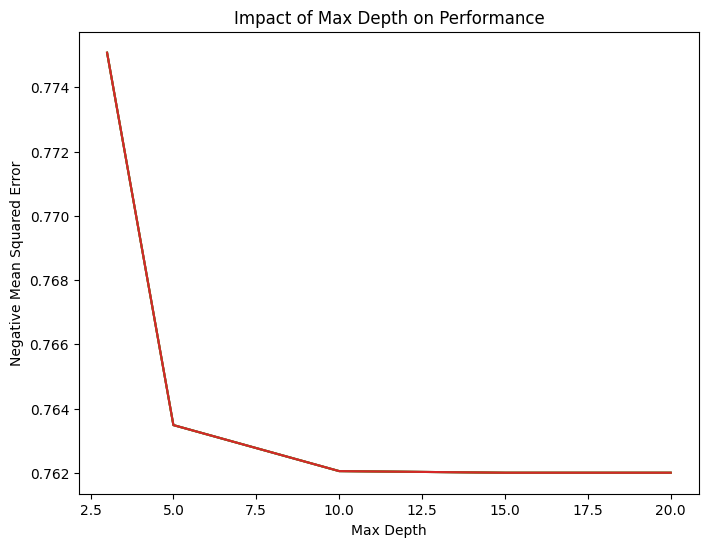

In [314]:
results = pd.DataFrame(grid_search.cv_results_)

# Visualize the impact of max_depth on performance
plt.figure(figsize=(8, 6))
for min_samples_split in param_grid['min_samples_split']:
    subset = results[results['param_min_samples_split'] == min_samples_split]
    plt.plot(subset['param_max_depth'], -subset['mean_test_score'], label=f"min_samples_split={min_samples_split}")

plt.xlabel("Max Depth")
plt.ylabel("Negative Mean Squared Error")
plt.title("Impact of Max Depth on Performance")
plt.show()


Based on the hyperparameter tuning results, we selected the following configuration:

In [316]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (Negative MSE):", grid_search.best_score_)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score (Negative MSE): -0.7620019465473756


In [317]:
decision_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=1, min_samples_split=2)

decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15)

In [318]:
y_pred = decision_tree.predict(X_test)

# Evaluate
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 0.704175873416467
R² Score: 0.2787105416129704


#### Feature Importance

To identify which vehicle type drives car prices the most

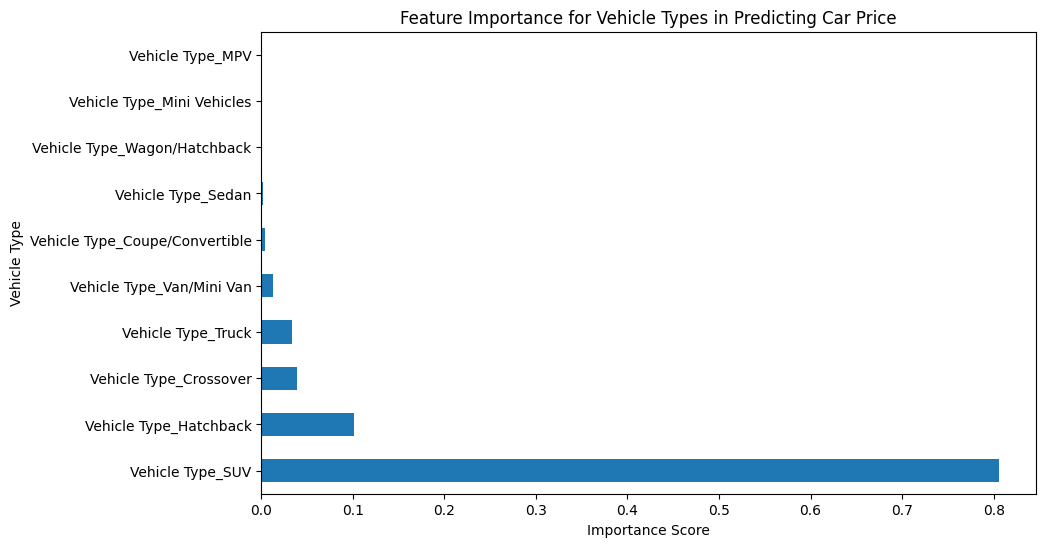

In [319]:
feature_importance = pd.Series(decision_tree.feature_importances_, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance[:10].plot(kind='barh')
plt.title('Feature Importance for Vehicle Types in Predicting Car Price')
plt.xlabel('Importance Score')
plt.ylabel('Vehicle Type')
plt.show()

##### Influence of Vehicle Body Type on Market Value

The above graph depicts the importance of various vehicle body types in predicting car prices, offering insight into the extent to which vehicle body type influences market value.

1. **Significant Influence of SUVs**:
   - SUVs stand out as the most significant contributor to car price prediction, with an importance score close to **0.8**.
   - This suggests that SUVs are highly valued in the market, likely due to their larger size, versatility, and preference in both urban and rural settings in Pakistan.

2. **Moderate Impact of Hatchbacks**:
   - Hatchbacks show a moderate influence, with an importance score slightly above **0.1**.
   - These vehicles are often preferred by individuals or small families, making them popular in budget-friendly segments.

3. **Minimal Influence of Other Body Types**:
   - Body types such as trucks, crossovers, vans/mini-vans, and sedans exhibit much lower importance scores, typically below **0.05**.
   - This indicates a relatively minor impact on market value, potentially reflecting limited demand or niche utility for these types of vehicles.

4. **Negligible Impact of Certain Body Types**:
   - Mini vehicles, MPVs, and coupes/convertibles have the least influence, with importance scores close to **0.0**.
   - These categories might cater to very specific market segments, leading to their minimal impact on overall car prices.

### Conclusion:
The results clearly indicate that **vehicle body type significantly affects market value**, with SUVs leading by a wide margin. This dominance suggests a high demand for SUVs, possibly influenced by their utility, status symbol, and adaptability. In contrast, other vehicle types play a smaller role in determining market value, reflecting their niche appeal or lower demand.

## Causal Inference Framework

We will now use Causal Inference to determine the brand value retention and regional variation in car preferences

### Loading the Dataset

In [369]:
ads_df = pd.read_csv(os.path.join('cleaned datasets', 'dataset_1.csv'))
ads_df.head()

,Ad Ref,Make,Model,Vehicle,Year,Vehicle Type,Mileage,Engine Type,Transmission,Price,...,Rear Camera,Power Steering,Import Date,Registered In,Battery Capacity,Color,Engine Capacity,Assembly,Dealer,Featured
0,9307635,MG,HS,MG HS Trophy 2021,2021,Crossover,31500,Petrol,Automatic,6650000.0,...,0,1,NaN,Punjab,NaN,Pearl White Metallic,1500 cc,Imported,1,1
1,9233999,BMW,X1,BMW X1 sDrive18i 2017,2017,Crossover,70000,Petrol,Automatic,6800000.0,...,0,1,NaN,Islamabad,NaN,Alpine White,1500 cc,Local,1,0
2,9259914,Toyota,Land Cruiser,Toyota Land Cruiser ZX 2022,2022,SUV,30,Petrol,Automatic,73500000.0,...,0,1,NaN,Un-Registered,NaN,White,4600 cc,Imported,0,1
3,9241391,Suzuki,Swift,Suzuki Swift DLX 1.3 Navigation 2018,2018,Hatchback,100000,Petrol,Manual,2750000.0,...,0,1,NaN,Islamabad,NaN,Graphite Grey,1300 cc,Local,1,0
4,9238264,Suzuki,Carry,Suzuki Mega Carry Xtra Manual 2019,2019,Pick Up,1,Petrol,Manual,3500000.0,...,0,0,NaN,Karachi,NaN,Snow White Pearl,1500 cc,Local,1,0


**Cleaning Numerical Columns**

*Engine Capacity:* The Engine Capacity column initially contained strings such as "1500 cc". These were cleaned by removing the cc unit, and then converting the values to float for numerical analysis.
*Battery Capacity:* Similarly, the Battery Capacity column, which included values like "60.0 kWh", was cleaned by removing the kWh unit, and then converting the values to float for numerical analysis.

In [370]:
ads_df['Engine Capacity'] = ads_df['Engine Capacity'].str.replace('cc', '').str.strip().astype(float) # cc
ads_df['Battery Capacity'] = ads_df['Battery Capacity'].str.replace('kWh', '').str.strip().astype(float) # kWh

**Removing Unnecessary Columns**

In [371]:
remove_cols = ['Ad Ref', 'Import Date', 'Registered In', 'Color', 'City', 'Vehicle']

data = ads_df.apply(lambda col: col.astype(bool) if col.dtype == 'int' and col.isin([0, 1]).all() else col)
data.drop(columns=remove_cols, inplace=True)

In [372]:
ss = StandardScaler()
columns_to_scale = ['Mileage', 'Battery Capacity', 'Engine Capacity', 'Price']
data[columns_to_scale] = ss.fit_transform(data[columns_to_scale])
data.head()

,Make,Model,Year,Vehicle Type,Mileage,Engine Type,Transmission,Price,Province,Keyless Entry,...,Front Speakers,Power Windows,Front Camera,Rear Camera,Power Steering,Battery Capacity,Engine Capacity,Assembly,Dealer,Featured
0,MG,HS,2021,Crossover,-0.731469,Petrol,Automatic,0.370983,Punjab,True,...,False,True,False,False,True,NaN,0.199649,Imported,True,True
1,BMW,X1,2017,Crossover,-0.286953,Petrol,Automatic,0.394298,Punjab,True,...,False,True,False,False,True,NaN,0.199649,Local,True,False
2,Toyota,Land Cruiser,2022,SUV,-1.094817,Petrol,Automatic,10.761822,Islamabad,True,...,False,True,False,False,True,NaN,5.036147,Imported,False,True
3,Suzuki,Swift,2018,Hatchback,0.059423,Petrol,Manual,-0.235214,Punjab,False,...,False,True,False,False,True,NaN,-0.112383,Local,True,False
4,Suzuki,Carry,2019,Pick Up,-1.095152,Petrol,Manual,-0.118638,Punjab,False,...,False,False,False,False,False,NaN,0.199649,Local,True,False


### Brand Value Retention

1. **Treatment:** Make (Car Brand)

2. **Outcome:** Depreciation Rate (Price / Year)

3. **Covariates:** Mileage, Engine Capacity, Vehicle Type, Assembly, Transmission

**Evaluating Depreciation Rates**

In [373]:
data['Depreciation Rate'] = data['Price'] / (2024 - data['Year'] + 1)
data['Depreciation Rate'] = data['Depreciation Rate'].fillna(0)

**ATE**

In [382]:
treated_averages = []
control_averages = []

for make in data['Make'].unique():
    temp_df = data[data['Make'] == make]

    treated_mean = temp_df[temp_df['Assembly'] == 'Imported']['Depreciation Rate'].mean()

    control_mean = data[data['Make'] != make]['Depreciation Rate'].mean()

    treated_averages.append((make, treated_mean))
    control_averages.append((make, control_mean))

results = pd.DataFrame({
    'Make': [x[0] for x in treated_averages],
    'Treated Mean (Imported)': [x[1] for x in treated_averages],
    'Control Mean (Local/Other)': [x[1] for x in control_averages],
})

results['ATE'] = results['Treated Mean (Imported)'] - results['Control Mean (Local/Other)']


In [383]:
results.head()

,Make,Treated Mean (Imported),Control Mean (Local/Other),ATE
0,MG,0.109485,0.042243,0.067241
1,BMW,1.410214,0.038424,1.371789
2,Toyota,0.106969,0.022811,0.084158
3,Suzuki,-0.028463,0.076045,-0.104508
4,Changan,0.020156,0.043038,-0.022882


**Visualization**

In [378]:
# Sort results by ATE
results_sorted = results.sort_values(by='ATE', ascending=False)

# Top 10 Makes
top_10 = results_sorted.head(10)

# Lowest 10 Makes
lowest_10 = results_sorted.tail(10)

/var/folders/md/3qtr0hg57rvdx_k4yclxffgw0000gn/T/ipykernel_4617/136716053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Make', y='ATE', palette='Blues_d')


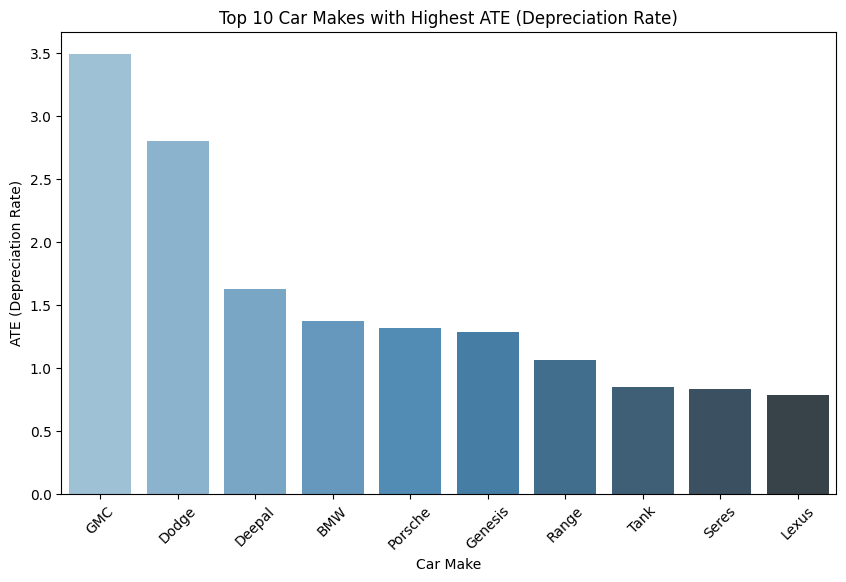

In [379]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='Make', y='ATE', palette='Blues_d')
plt.title('Top 10 Car Makes with Highest ATE (Depreciation Rate)')
plt.xlabel('Car Make')
plt.ylabel('ATE (Depreciation Rate)')
plt.xticks(rotation=45)
plt.show()

/var/folders/md/3qtr0hg57rvdx_k4yclxffgw0000gn/T/ipykernel_4617/978231406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_10, x='Make', y='ATE', palette='Blues_d')


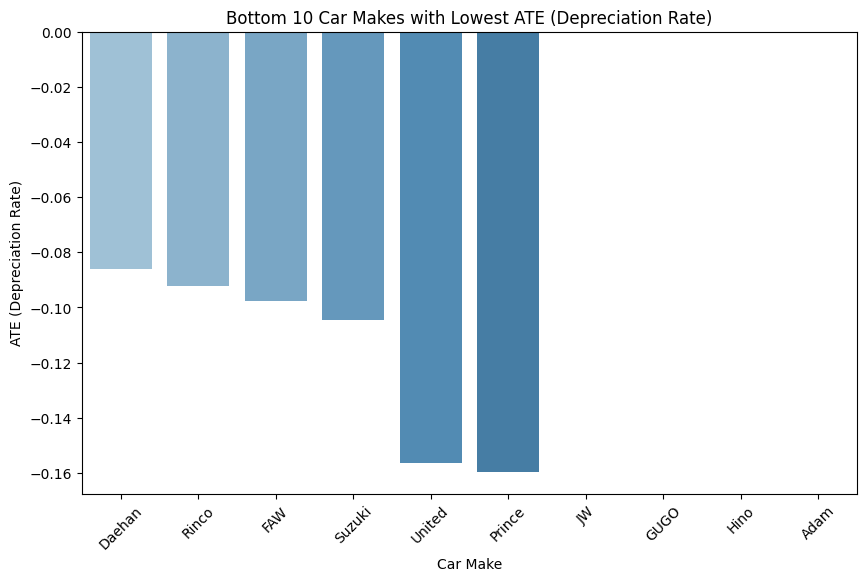

In [381]:
plt.figure(figsize=(10, 6))
sns.barplot(data=lowest_10, x='Make', y='ATE', palette='Blues_d')
plt.title('Bottom 10 Car Makes with Lowest ATE (Depreciation Rate)')
plt.xlabel('Car Make')
plt.ylabel('ATE (Depreciation Rate)')
plt.xticks(rotation=45)
plt.show()

In [387]:
# Calculate average depreciation for domestic and imported cars
domestic_cars = data[data['Assembly'] == 'Local']['Depreciation Rate']
imported_cars = data[data['Assembly'] == 'Imported']['Depreciation Rate']

# Calculate the means
mean_domestic = domestic_cars.mean()
mean_imported = imported_cars.mean()

# Calculate the Average Treatment Effect (ATE)
ate = mean_imported - mean_domestic

# Print the results
print(f"Mean Depreciation Rate (Domestic): {mean_domestic:.4f}")
print(f"Mean Depreciation Rate (Imported): {mean_imported:.4f}")
print(f"Average Treatment Effect (ATE): {ate:.4f}")


Mean Depreciation Rate (Domestic): 0.0231
Mean Depreciation Rate (Imported): 0.0843
Average Treatment Effect (ATE): 0.0612


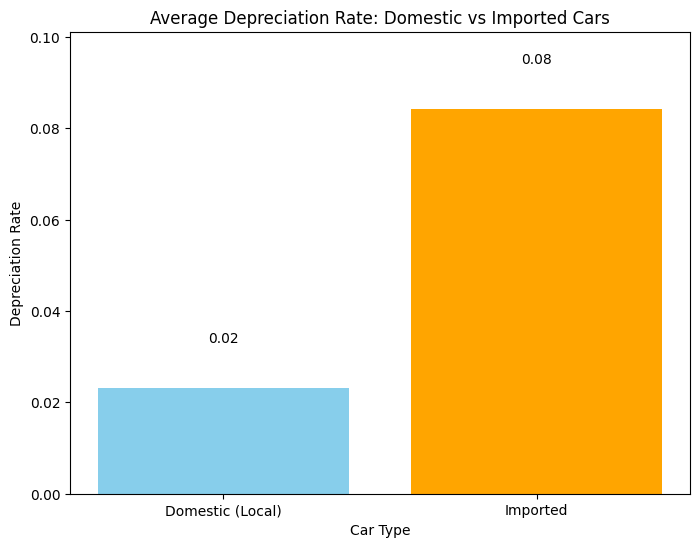

In [390]:
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'orange'])
plt.title('Average Depreciation Rate: Domestic vs Imported Cars')
plt.ylabel('Depreciation Rate')
plt.xlabel('Car Type')
plt.ylim(0, max(values) * 1.2)
for i, val in enumerate(values):
    plt.text(i, val + 0.01, f"{val:.2f}", ha='center', fontsize=10)
plt.show()

### Analysis of ATE Results for Depreciation Rates Across Car Brands

#### Do Certain Car Brands Retain Their Value Better Over Time Compared to Others?

From the visualizations above, we can derive several insights about the value retention capabilities of various car brands, addressing both the overarching research question and sub-questions.


#### **Comparing Depreciation Rates Across Automotive Brands**
- **Top 10 Brands with Highest Depreciation Rates (First Graph)**:
  - Brands such as **GMC**, **Dodge**, and **Deepal** exhibit the **highest Average Treatment Effect (ATE)** values, indicating they tend to depreciate at a significantly higher rate compared to other brands. 
  - These brands, while often associated with luxury or niche markets, may lack the demand or market conditions to sustain value over time in the context of Pakistan. High initial costs might also contribute to steeper depreciation curves.
  
- **Bottom 10 Brands with Lowest Depreciation Rates (Second Graph)**:
  - On the other end, brands such as **Adam**, **Hino**, and **GUGO** show the **lowest ATE** values, with depreciation rates even entering the negative range. 
  - These brands are likely to offer **excellent value retention** over time, potentially due to lower initial costs, higher demand, or better affordability in the local market.


#### **Evaluating the Relationship Between Brand Reputation and Value Retention**
- Established brands such as **BMW** and **Porsche** appear in the higher depreciation group, suggesting that reputation alone does not guarantee strong value retention.
- Domestic or budget-friendly brands like **Suzuki** and **FAW**, known for affordability and practicality, outperform premium brands in terms of depreciation resistance.


#### **Identifying Brands Offering Optimal Long-Term Investment Potential**
- Brands in the bottom 10 list (e.g., **Adam**, **United**, **Suzuki**) provide better value stability, making them more attractive for long-term investments.
- Brands show strongest resistance, with their depreciation rates being close to or below zero.
- On the contrary, brands with the highest depreciation (e.g., **GMC**, **Dodge**) may appeal to a niche audience but pose a higher financial risk for long-term buyers.

#### **Do Domestic Cars Retain Value Differently Compared to Imported Cars in Pakistan?**

Yes, domestic cars (locally assembled) retain their value significantly better compared to imported cars in Pakistan. The analysis shows that the **average depreciation rate for domestic cars is 0.02**, whereas for imported cars, it is substantially higher at **0.08**. 

This suggests that imported cars experience a faster decline in value over time, which can be attributed to several factors:
- **Higher Initial Costs:** Imported cars are more expensive due to taxes and luxury features, leading to sharper depreciation.
- **After-Sales Support:** Domestic cars often have better support for maintenance and spare parts, making them more appealing for long-term ownership.
- **Market Preferences:** Locally assembled cars are tailored to the preferences and needs of the local market, contributing to steadier demand and slower depreciation.

For car buyers in Pakistan, these findings indicate that domestic cars may be a better choice for those prioritizing value retention, while imported cars, despite their premium features, may come with higher depreciation risks.

### Regional Variation in Car Prices

1. **Treatment:** Province

2. **Outcome:** Average Car Price

3. **Covariates:** Mileage, Engine Capacity, Vehicle Type, Assembly

**Encoding Variables**

In [392]:
# Encode Province/City as Treatment
data['Region (Province)'] = data['Province'].astype('category').cat.codes

# Define treatment, outcome, and covariates
treatment = data['Region (Province)']
outcome = data['Price']
covariates = data[['Mileage', 'Engine Capacity', 'Vehicle Type', 'Make', 'Assembly']]

**ATE**

In [411]:
# Calculate regional ATE
results = []
regions = data['Region (Province)'].unique()

for region in regions:
    treated = data[data['Region (Province)'] == region]
    control = data[data['Region (Province)'] != region]

    avg_treated_price = treated['Price'].mean()
    avg_control_price = control['Price'].mean()
    
    ate = avg_treated_price - avg_control_price
    results.append({'Region': region, 'ATE': ate})
    
results_df = pd.DataFrame(results)

In [413]:
region_mapping = {
    0: 'Punjab',
    1: 'Islamabad',
    2: 'Sindh',
    3: 'KPK',
    4:'Balochistan',
    5:'Azad Kashmir'
}

# Map the region names to numbers in the Region column
results_df['Region'] = results_df['Region'].map(region_mapping)

/var/folders/md/3qtr0hg57rvdx_k4yclxffgw0000gn/T/ipykernel_4617/3229214254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Region', y='ATE', palette='coolwarm')


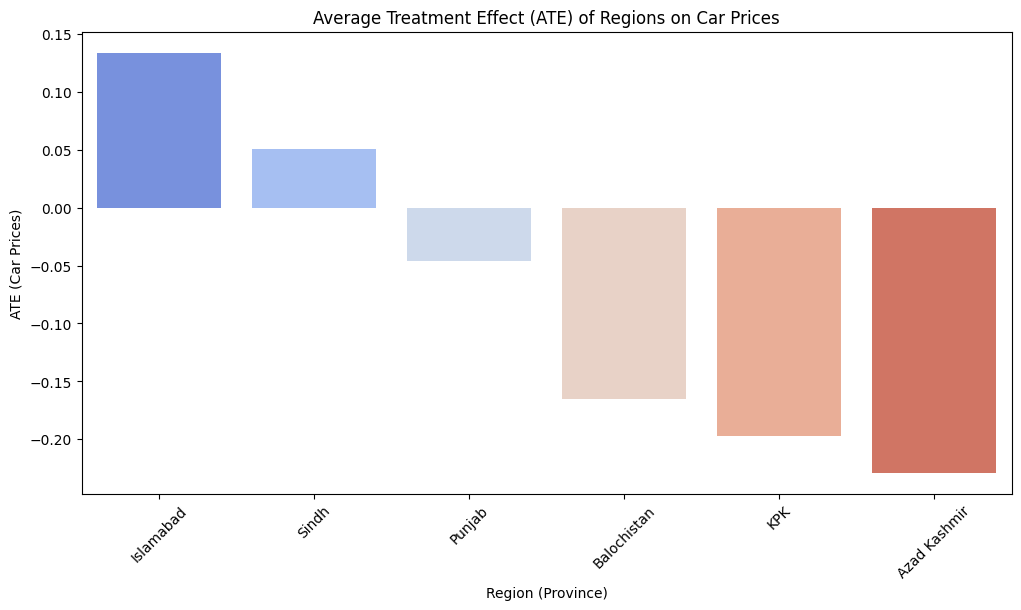

In [414]:
# Sort results by ATE
results_df = results_df.sort_values(by='ATE', ascending=False)

# Plot ATE for each region
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Region', y='ATE', palette='coolwarm')
plt.title('Average Treatment Effect (ATE) of Regions on Car Prices')
plt.xlabel('Region (Province)')
plt.ylabel('ATE (Car Prices)')
plt.xticks(rotation=45)
plt.show()

Based on the **Average Treatment Effect (ATE)** visualization, here’s an analysis of the regional variations in car prices and preferences across Pakistan:


### **Key Inference:**
**Regional Variation in Car Prices:**
   - The ATE analysis reveals **significant differences in car prices across regions**.
   - **Islamabad** exhibits the highest positive ATE, suggesting that cars in Islamabad are priced significantly higher than the national average.
   - **Sindh** also show positive ATEs, though less pronounced compared to Islamabad, indicating relatively stable or slightly above-average pricing.
   - **Balochistan**, **KPK**, and **Azad Kashmir** display negative ATEs, highlighting that cars in these regions are generally priced lower compared to the national average, with Azad Kashmir showing the steepest negative ATE.

**Do Average Car Prices Differ Significantly Across Various Regions in Pakistan?**
   - Yes, car prices vary significantly. The ATE values confirm that regions like **Islamabad** are hotspots for higher car prices, likely due to higher economic activity and consumer purchasing power.
   - Conversely, regions like **Azad Kashmir** and **KPK** have lower ATEs, potentially reflecting economic constraints and lower demand for high-priced vehicles.

**What Are the Regional Preferences for Car Types (e.g., Sedan, SUV, Hatchback)?**
   - While the chart focuses on price differences, further analysis of vehicle type distribution (e.g., SUVs in Islamabad, Hatchbacks in Punjab) would be necessary to identify regional preferences explicitly.
   - Regions with higher ATEs, like Islamabad, may prefer luxury car types (e.g., SUVs or Sedans), while regions with negative ATEs may lean towards more affordable models like Hatchbacks or Mini-Vehicles.

**How Does Regional Economic Status Influence Car Prices and Preferences?**
   - **Economic disparity** across regions is a significant factor:
   - Regions with higher economic activity (e.g., Islamabad, Sindh) show positive ATEs, reflecting higher purchasing power and a preference for premium vehicles.
   - Regions with lower ATEs (e.g., Balochistan, KPK, Azad Kashmir) may indicate limited affordability, leading to lower-priced vehicles being more prevalent.


### **Conclusion:**
The regional analysis highlights notable disparities in car prices and preferences driven by economic factors, consumer behavior, and local market dynamics. **Islamabad emerges as the region with the highest car prices**, likely reflecting its status as a metropolitan hub, while regions like Azad Kashmir and Balochistan exhibit lower pricing trends. Further analysis of specific car types and brands would provide deeper insights into regional preferences.

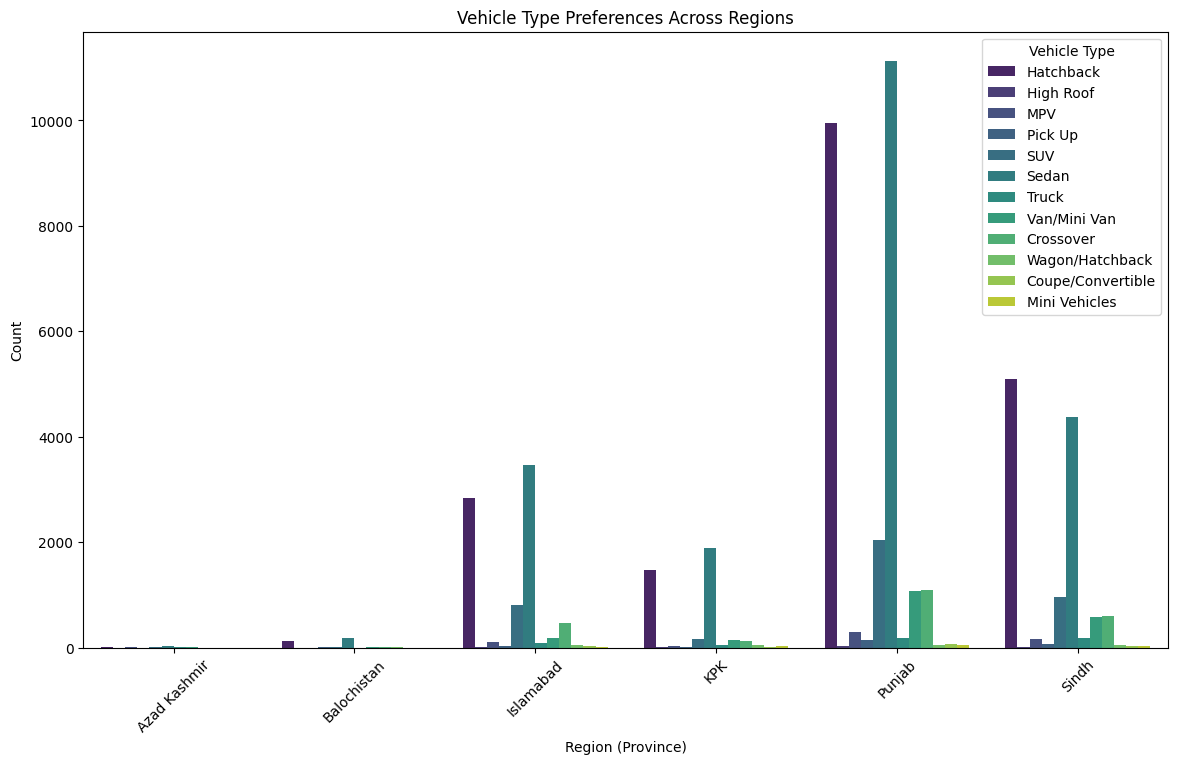

In [415]:
# Vehicle type preferences by region
vehicle_prefs = data.groupby(['Province', 'Vehicle Type']).size().reset_index(name='Count')

# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(data=vehicle_prefs, x='Province', y='Count', hue='Vehicle Type', palette='viridis')
plt.title('Vehicle Type Preferences Across Regions')
plt.xlabel('Region (Province)')
plt.ylabel('Count')
plt.legend(title='Vehicle Type')
plt.xticks(rotation=45)
plt.show()

**Brand preferences by region**

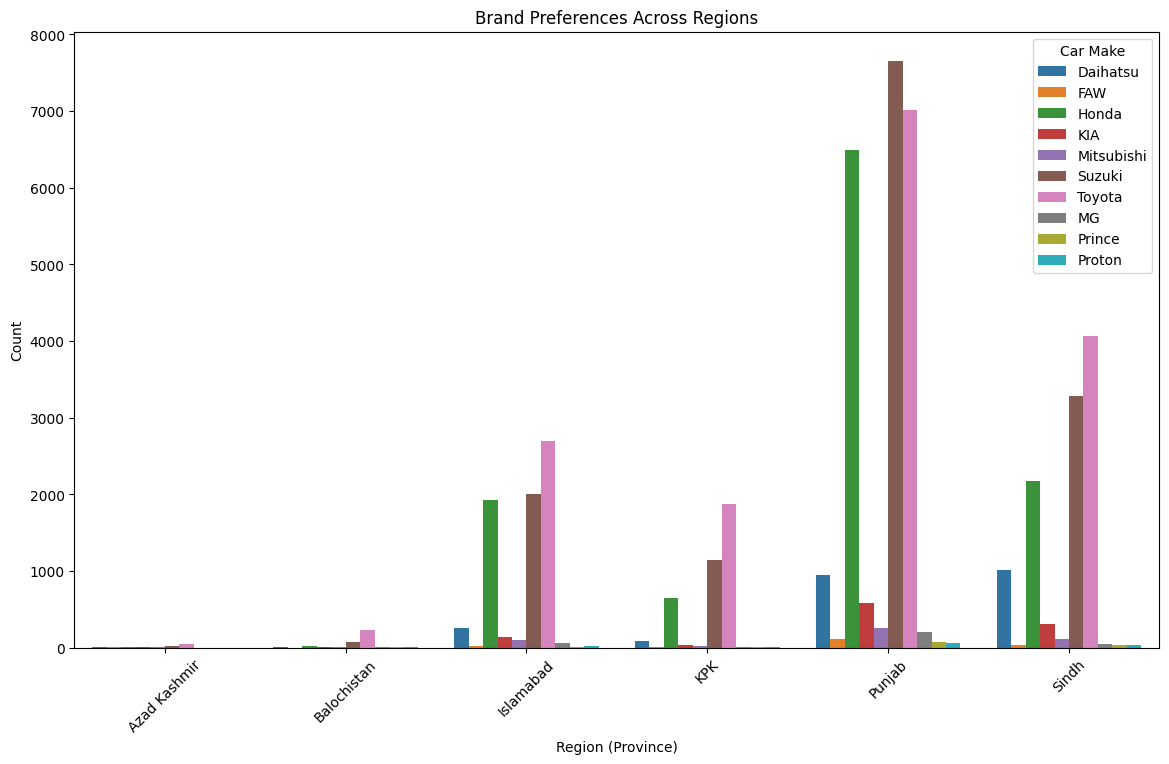

In [423]:
# Brand preferences by region
brand_prefs = data.groupby(['Province', 'Make']).size().reset_index(name='Count')

# Filter top brands for clarity
top_brands = brand_prefs['Make'].value_counts().head(10).index
brand_prefs = brand_prefs[brand_prefs['Make'].isin(top_brands)]

# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(data=brand_prefs, x='Province', y='Count', hue='Make')
plt.title('Brand Preferences Across Regions')
plt.xlabel('Region (Province)')
plt.ylabel('Count')
plt.legend(title='Car Make')
plt.xticks(rotation=45)
plt.show()

**Car preferences by region**

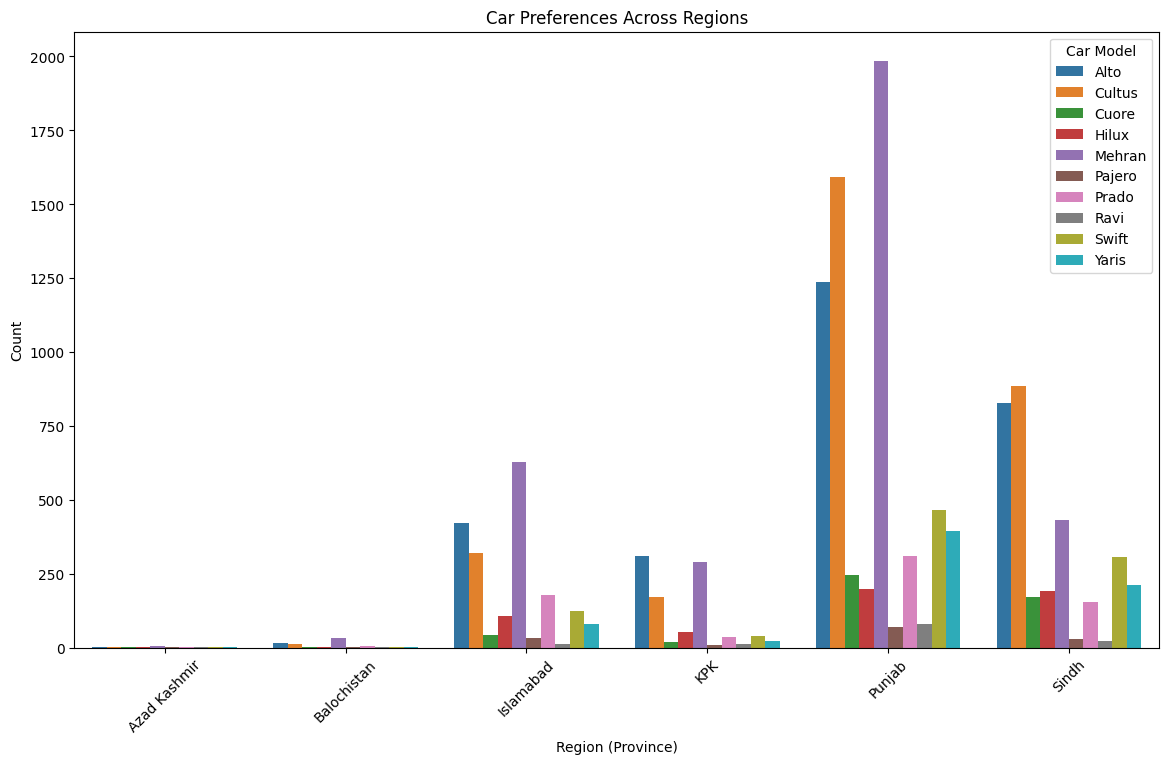

In [425]:
# car preference by region
brand_prefs = data.groupby(['Province', 'Model']).size().reset_index(name='Count')

# Filter top cars for clarity
top_brands = brand_prefs['Model'].value_counts().head(10).index
brand_prefs = brand_prefs[brand_prefs['Model'].isin(top_brands)]

# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(data=brand_prefs, x='Province', y='Count', hue='Model')
plt.title('Car Preferences Across Regions')
plt.xlabel('Region (Province)')
plt.ylabel('Count')
plt.legend(title='Car Model')
plt.xticks(rotation=45)
plt.show()